# Appliances Energy Prediction

* by: [Ghazian Hirzi Hanafi](https://www.linkedin.com/in/ghazianhanafi/) 
* Being helped by: [ChatGPT](https://chatgpt.com/) & [Preplexity](https://www.perplexity.ai/)
* 2025/04/26
* This file contain:

||Content|
|--|--|
|1|[Introduction](#intro)|
|2|[Additional Information](#addvarinf)|
|3|[Exploratory Data Analysis](#expldt)|
|4|[Model & Prediction Evaluation](#mprdeval)|

* Abstract:

**Background**Energy efficiency can be achieved by understanding past energy usage and predicting future consumption under specific conditions. 

**Methode** In this notebook, I predict appliance energy usage using several machine learning models, including XGB Regressor, Random Forest Regressor, Extra Trees Regressor, HistGradient Boosting, Gradient Boosting Regressor, Multi-Layer Perceptron Regressor, KNeighbors Regressor, and Linear Regression. Each model’s predictions were evaluated using cross-validation, with performance measured by metrics such as Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), Root Mean Squared Error (RMSE), and R².

**Result** The results show that the XGB Regressor performed best, achieving an average RMSE of 64.434 ± 5.383 and an average R² of 0.606 ± 0.054. The data also indicate a significant difference in appliance usage between periods of cold and normal Thermal Humidity Index (THI) conditions when cold the energy usage of appliances tends to be lower.

**Recommendation** :
1. Conduct further observations, ideally covering a full seasonal cycle.
2. Add more detailed measurements or separate sensors for energy usage.
3. Explore and discuss additional strategies for reducing electricity consumption to achieve greater energy efficiency.
4. Use the XGB Regressor model, as it can explain approximately 60% of the variation in energy usage.

## Introduction <h2 id=intro><h2>

In [1]:
# Open Data
# tools and data 
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
appliances_energy_prediction = fetch_ucirepo(id=374) 
  
# data (as pandas dataframes) 
X = appliances_energy_prediction.data.features 
y = appliances_energy_prediction.data.targets 

# Convert date into datetime 
df=appliances_energy_prediction.data.original
df['date']=df['date'].str.replace(r'(\d{4}-\d{2}-\d{2})(\d{2}:\d{2}:\d{2})', r'\1 \2', regex=True)
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['month']=df['date'].dt.month
df['hour']=df['date'].dt.hour 
df['dow']=df['date'].dt.dayofweek 


In [2]:
#--------CALCULATE THI(THERMAL HUMIDITY INDEX)-------#

def calculate_thi(T,RH):
#    thi=T - (0.55 - 0.0055 * RH) * (T - 14.5)
    thi=0.8*T+((RH*T)/500)
    return thi
for i in range(1,10):
    df[f'THI_{i}']=calculate_thi(df[f'T{i}'],df[f'RH_{i}'])
df[f'THI_out']=calculate_thi(df[f'T_out'],df[f'RH_out'])
df.describe()

date    Appliances        lights            T1  \
count                19735  19735.000000  19735.000000  19735.000000   
mean   2016-03-20 05:30:00     97.694958      3.801875     21.686571   
min    2016-01-11 17:00:00     10.000000      0.000000     16.790000   
25%    2016-02-14 23:15:00     50.000000      0.000000     20.760000   
50%    2016-03-20 05:30:00     60.000000      0.000000     21.600000   
75%    2016-04-23 11:45:00    100.000000      0.000000     22.600000   
max    2016-05-27 18:00:00   1080.000000     70.000000     26.260000   
std                    NaN    102.524891      7.935988      1.606066   

               RH_1            T2          RH_2            T3          RH_3  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.259739     20.341219     40.420420     22.267611     39.242500   
min       27.023333     16.100000     20.463333     17.200000     28.766667   
25%       37.333333     18.790000     37.900000     20.790000     36.900000   
50%       39.656667     20.000000     40.500000     22.100000     38.530000   
75%       43.066667     21.500000     43.260000     23.290000     41.760000   
max       63.360000     29.856667     56.026667     29.236000     50.163333   
std        3.979299      2.192974      4.069813      2.006111      3.254576   

                 T4  ...         THI_1         THI_2         THI_3  \
count  19735.000000  ...  19735.000000  19735.000000  19735.000000   
mean      20.855335  ...     19.097545     17.914421     19.561616   
min       15.100000  ...     14.946122     14.308704     15.223032   
25%       19.530000  ...     18.193576     16.589171     18.244377   
50%       20.666667  ...     18.986400     17.598323     19.405308   
75%       22.100000  ...     19.913775     18.961135     20.459047   
max       26.200000  ...     23.315204     25.797951     25.570741   
std        2.042884  ...      1.457454      1.905814      1.770660   

              THI_4         THI_5         THI_6         THI_7         THI_8  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      18.311243     17.671184      6.937756     17.647385     19.510694   
min       13.414840     13.821221     -5.853460     13.544423     14.584828   
25%       17.106626     16.419999      3.410333     16.370033     18.476346   
50%       18.107341     17.467128      6.650578     17.428884     19.542438   
75%       19.366952     18.554000     10.069981     18.727707     20.670464   
max       23.246586     24.908288     22.688580     22.734400     24.464703   
std        1.800723      1.716479      5.046057      1.850695      1.708281   

              THI_9       THI_out  
count  19735.000000  19735.000000  
mean      17.207883      7.021371  
min       13.237210     -4.910000  
25%       15.912641      3.543215  
50%       17.033576      6.636800  
75%       18.171200      9.936400  
max       21.912659     22.498200  
std        1.792294      4.904352  

[8 rows x 42 columns]

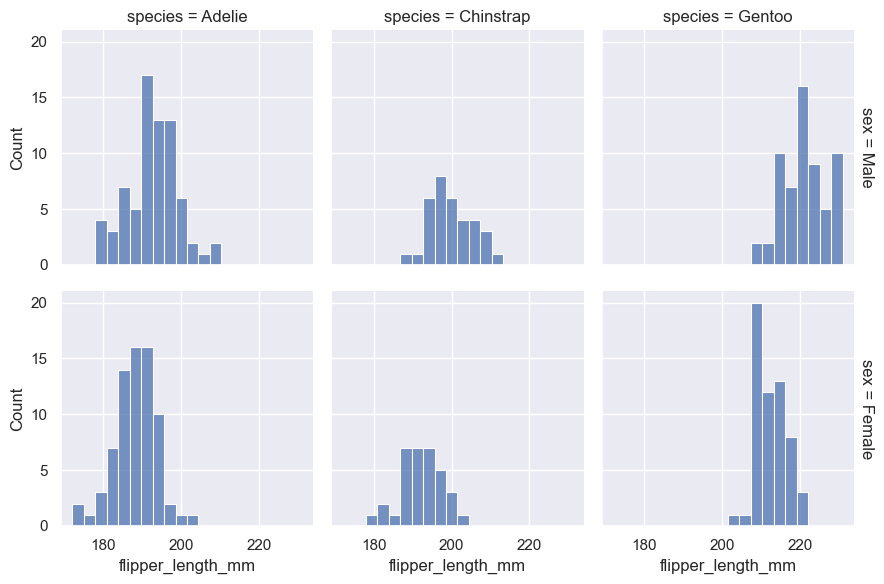

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize=(20,20))
#df.hist(bins=30,figsize=(20,20))
#plt.show()
import seaborn as sns

sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

Note:
* I am uncertain whether the Thermal Humidity Index (THI) is the most appropriate metric for assessing indoor thermal comfort, but it offers practical advantages for profiling analysis by consolidating temperature and humidity into a single value. As demonstrated in my analysis below, I frequently employ THI as a criterion due to its simplicity and empirical foundation. The THI calculation derives from Robert G. Steadman’s 1979 work, which established the original heat index (HI) through a physiologically grounded model of human thermoregulation and clothing science. Steadman’s framework correlates ambient conditions with perceived "sultriness," defining apparent temperature as the dry-bulb temperature that would feel equivalent under a baseline vapor pressure of 1.6 kPa.[*](https://www.weather.gov/arx/heatindex_climatology)

## Additional Variable Information
<h2 id=addvarinf><h2>

[Complete Information](https://orbi.umons.ac.be/bitstream/20.500.12907/23357/1/1-s2.0-S0378778816308970-main.pdf)


The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

* date time year-month-day hour:minute:second 
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chievres weather station), in Celsius
* Pressure (from Chievres weather station), in mm Hg
* RH_out, Humidity outside (from Chievres weather station), in %
* Wind speed (from Chievres weather station), in m/s
* Visibility (from Chievres weather station), in km
* Tdewpoint (from Chievres weather station), Â°C
* rv1, Random variable 1, nondimensional
* rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

In [ ]:
# No Need open not important 
# temp_loc=['T. Kitchen',"T. Living Room","T. Laundry Room","T. Office Room","T. Bathroom","T. OutB","T. ironing","T. Teenager","T. Parents"]
#rhum_loc=['RH. Kitchen',"RH. Living Room","RH. Laundry Room","RH. Office Room","RH. Bathroom","RH. OutB","RH. ironing","RH. Teenager","RH. Parents"]
#for i in range(1,10):
    

## Exploratory Data Analysis <h2 id=expldt><h2>

Initial Hypothesis:
Before delving into the data, my working hypothesis was as follows:

1. When outdoor temperatures are cold, achieving a comfortable indoor temperature will require increased energy consumption.
2. Conversely, when outdoor temperatures are moderate or close to the desired indoor temperature, energy consumption should decrease.

What the Data Revealed:
However, after reviewing the reference paper ([see source](#https://orbi.umons.ac.be/bitstream/20.500.12907/23357/1/1-s2.0-S0378778816308970-main.pdf)), I realized the dataset encompasses not only heating and cooling systems but also other household electrical appliances unrelated to temperature control. This broader definition of "appliance energy use" means that observed electricity consumption patterns may reflect a combination of thermal management and general household activities.

### Time Series

In [6]:
# Plot Time Series 
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

fig = go.Figure()
dfl=df.copy()#loc[df['Appliances'] < 175]
# Add AAPL Volume (Left Y-Axis)
param='Appliances'
fig.add_trace(go.Scatter(x=dfl['date'], y=df[param], 
                         mode='lines', name=f"{param}", 
                         yaxis="y1", line=dict(color='blue')))

# Add AAPL Open Price (Right Y-Axis)
param2='THI_out'
fig.add_trace(go.Scatter(x=dfl['date'], y=df[param2], 
                         mode='lines', name=f"{param2}", 
                         yaxis="y2", line=dict(color='orange')))
param3='THI_2'
fig.add_trace(go.Scatter(x=dfl['date'], y=df[param3], 
                         mode='lines', name=f"{param3}", 
                         yaxis="y2", line=dict(color='white')))
#param4='RH_2'
#fig.add_trace(go.Scatter(x=dfl['date'], y=df[param4], 
#                         mode='lines', name=f"{param4}", 
#                         yaxis="y2", line=dict(color='white')))
#
# Layout settings
fig.update_layout(
    template="plotly_dark",
    width=1200, height=650,
    title=f"Time Series of {param} and {param2}",
    xaxis=dict(title="Date"),
    yaxis=dict(title=f"{param}", side="left", showgrid=True),
    yaxis2=dict(title=f"{param2}", side="right", overlaying="y", showgrid=False),
#    yaxis3=dict(title=f"{param4}", side="right", overlaying="y3", showgrid=False,anchor="free"),
    legend=dict(x=0, y=1)
)

# Show figure
fig.show()

In [10]:
# Time Series Daily
dfd=df.set_index('date')
dfa=dfd.resample('1d').mean()#['Appliances']
dfd=dfd.resample('1d').sum()#['Appliances']

#px.line(dd,x='date',y='Appliances')

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

fig = go.Figure()
df_hour=dfa.reset_index()#.loc[df['Appliances'] < 175]
# Add AAPL Volume (Left Y-Axis)
param='Appliances'
fig.add_trace(go.Scatter(x=df_hour['date'], y=dfd[param], 
                         mode='lines', name=f"{param}", 
                         yaxis="y1", line=dict(color='blue')))

# Add AAPL Open Price (Right Y-Axis)
param2='THI_out'
fig.add_trace(go.Scatter(x=df_hour['date'], y=df_hour[param2], 
                         mode='lines', name=f"{param2}", 
                         yaxis="y2", line=dict(color='orange')))
param3='THI_2'
fig.add_trace(go.Scatter(x=df_hour['date'], y=df_hour[param3], 
                         mode='lines', name=f"{param3}", 
                         yaxis="y2", line=dict(color='white')))
#param4='RH_2'
#fig.add_trace(go.Scatter(x=dfl['date'], y=df[param4], 
#                         mode='lines', name=f"{param4}", 
#                         yaxis="y2", line=dict(color='white')))
#
# Layout settings
fig.update_layout(
    template="plotly_dark",
    width=1200, height=650,
    title=f"Time Series of {param} and {param2}",
    xaxis=dict(title="Date"),
    yaxis=dict(title=f"{param}", side="left", showgrid=True),
    yaxis2=dict(title=f"{param2}", side="right", overlaying="y", showgrid=False),
#    yaxis3=dict(title=f"{param4}", side="right", overlaying="y3", showgrid=False,anchor="free"),
    legend=dict(x=0, y=1)
)

# Show figure
fig.show()

At the beginning of analysis, my interpretation of this line chart is, the ammount of energy that being used at minute scale, is tends to be higher when the outside THI is considered cold, below 6 degrees.

### Correlation

<Axes: >

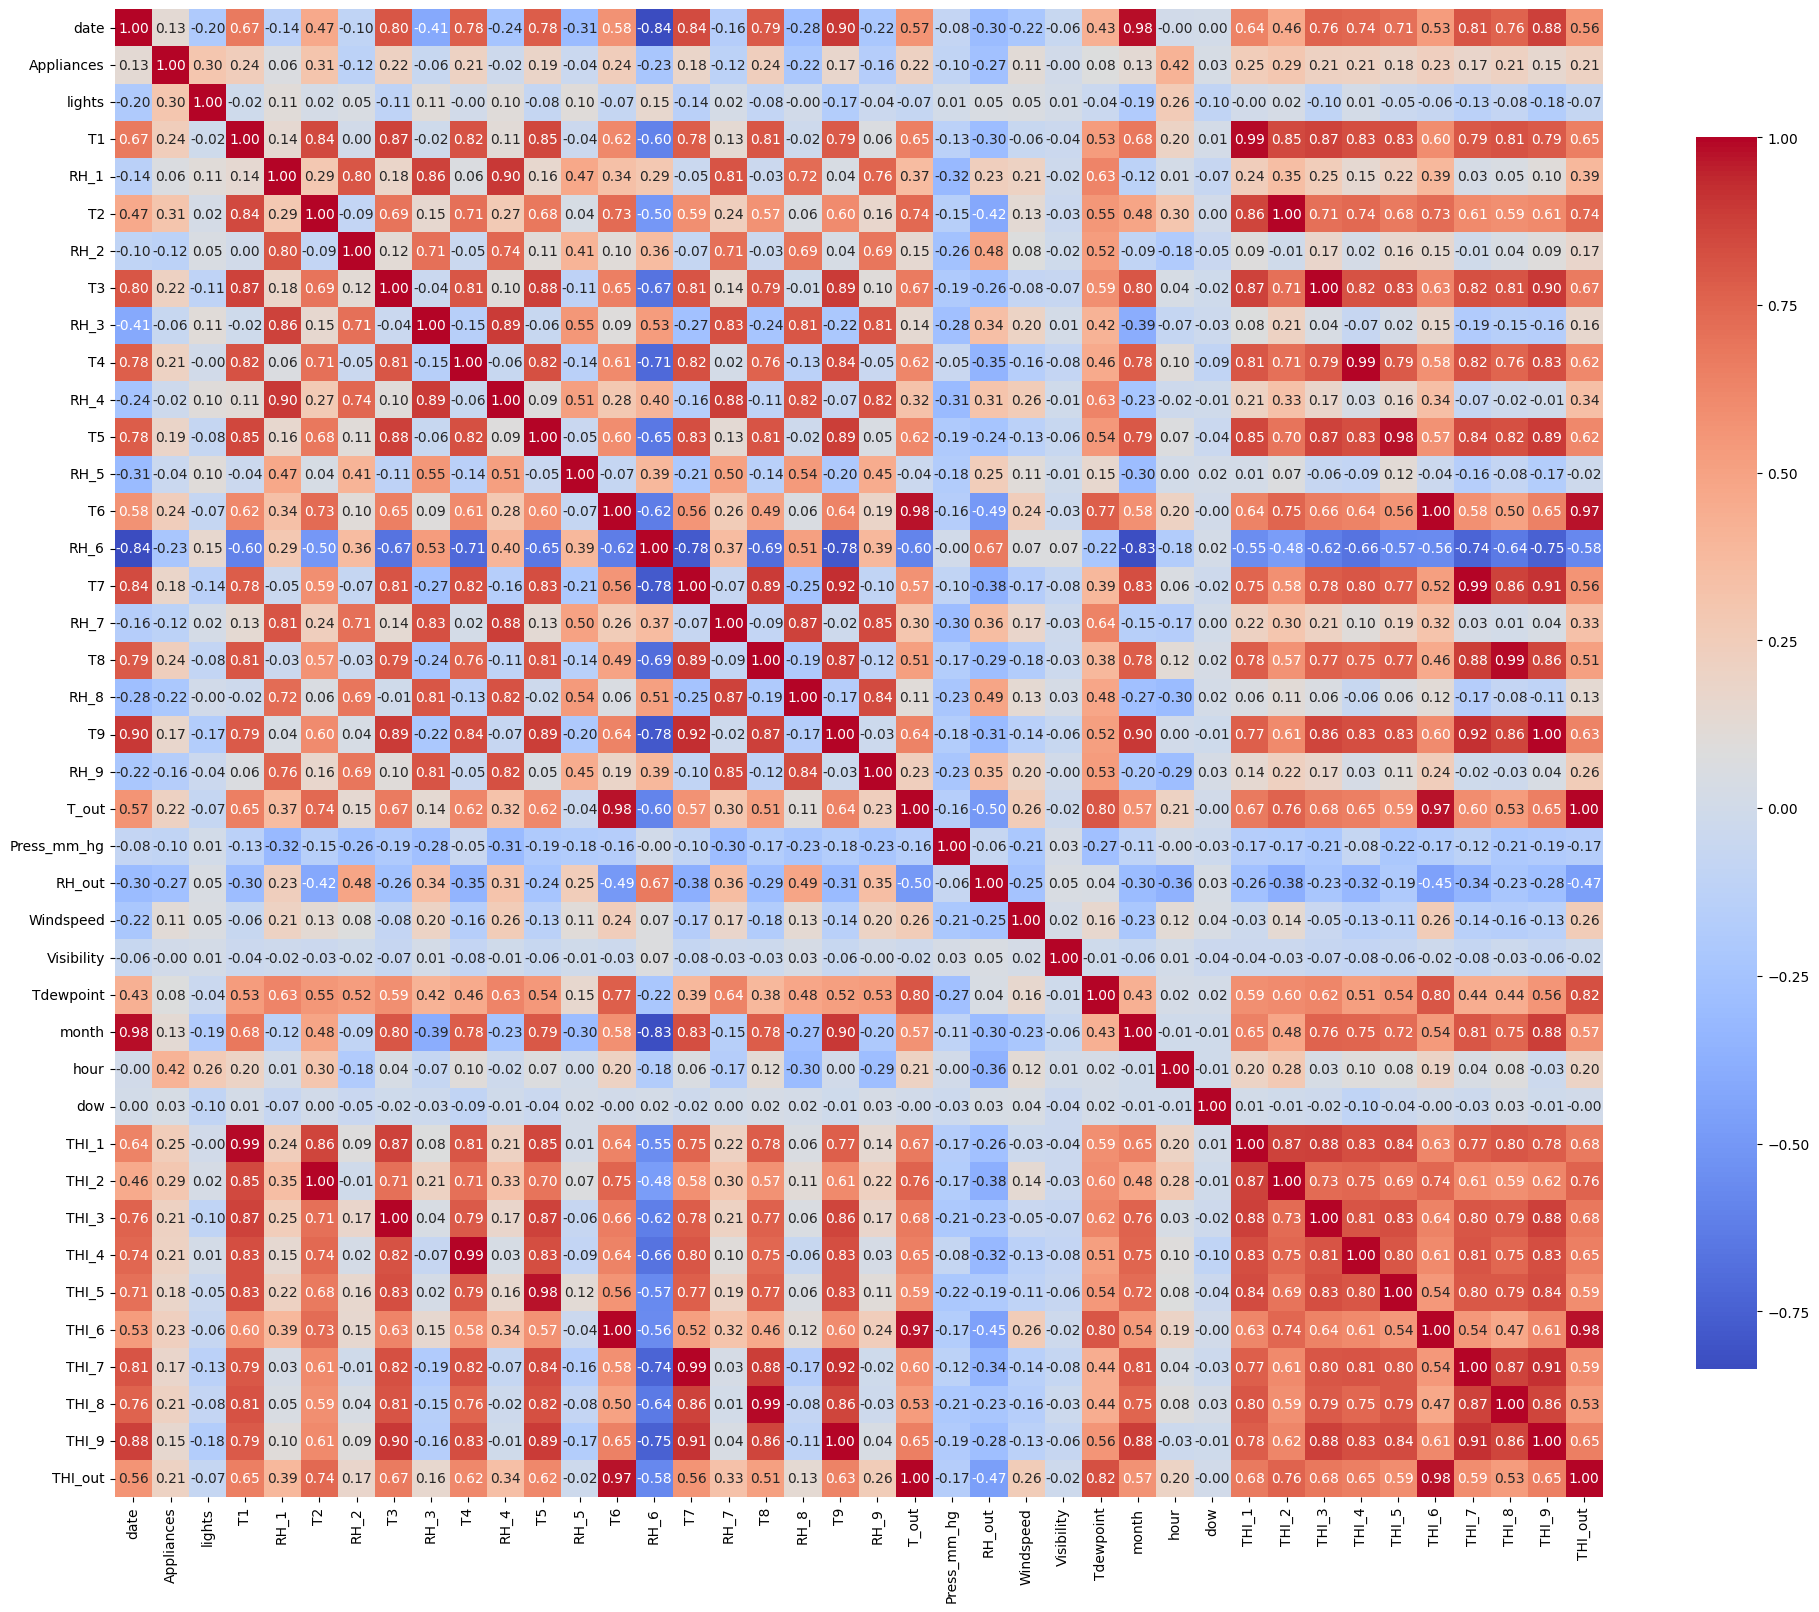

In [11]:
# Correlation heatmap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

dfx=df.drop(columns=['rv1','rv2'])
corr=dfl.corr(method='pearson')
corr=dfx.corr(method='spearman')

# plot the heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

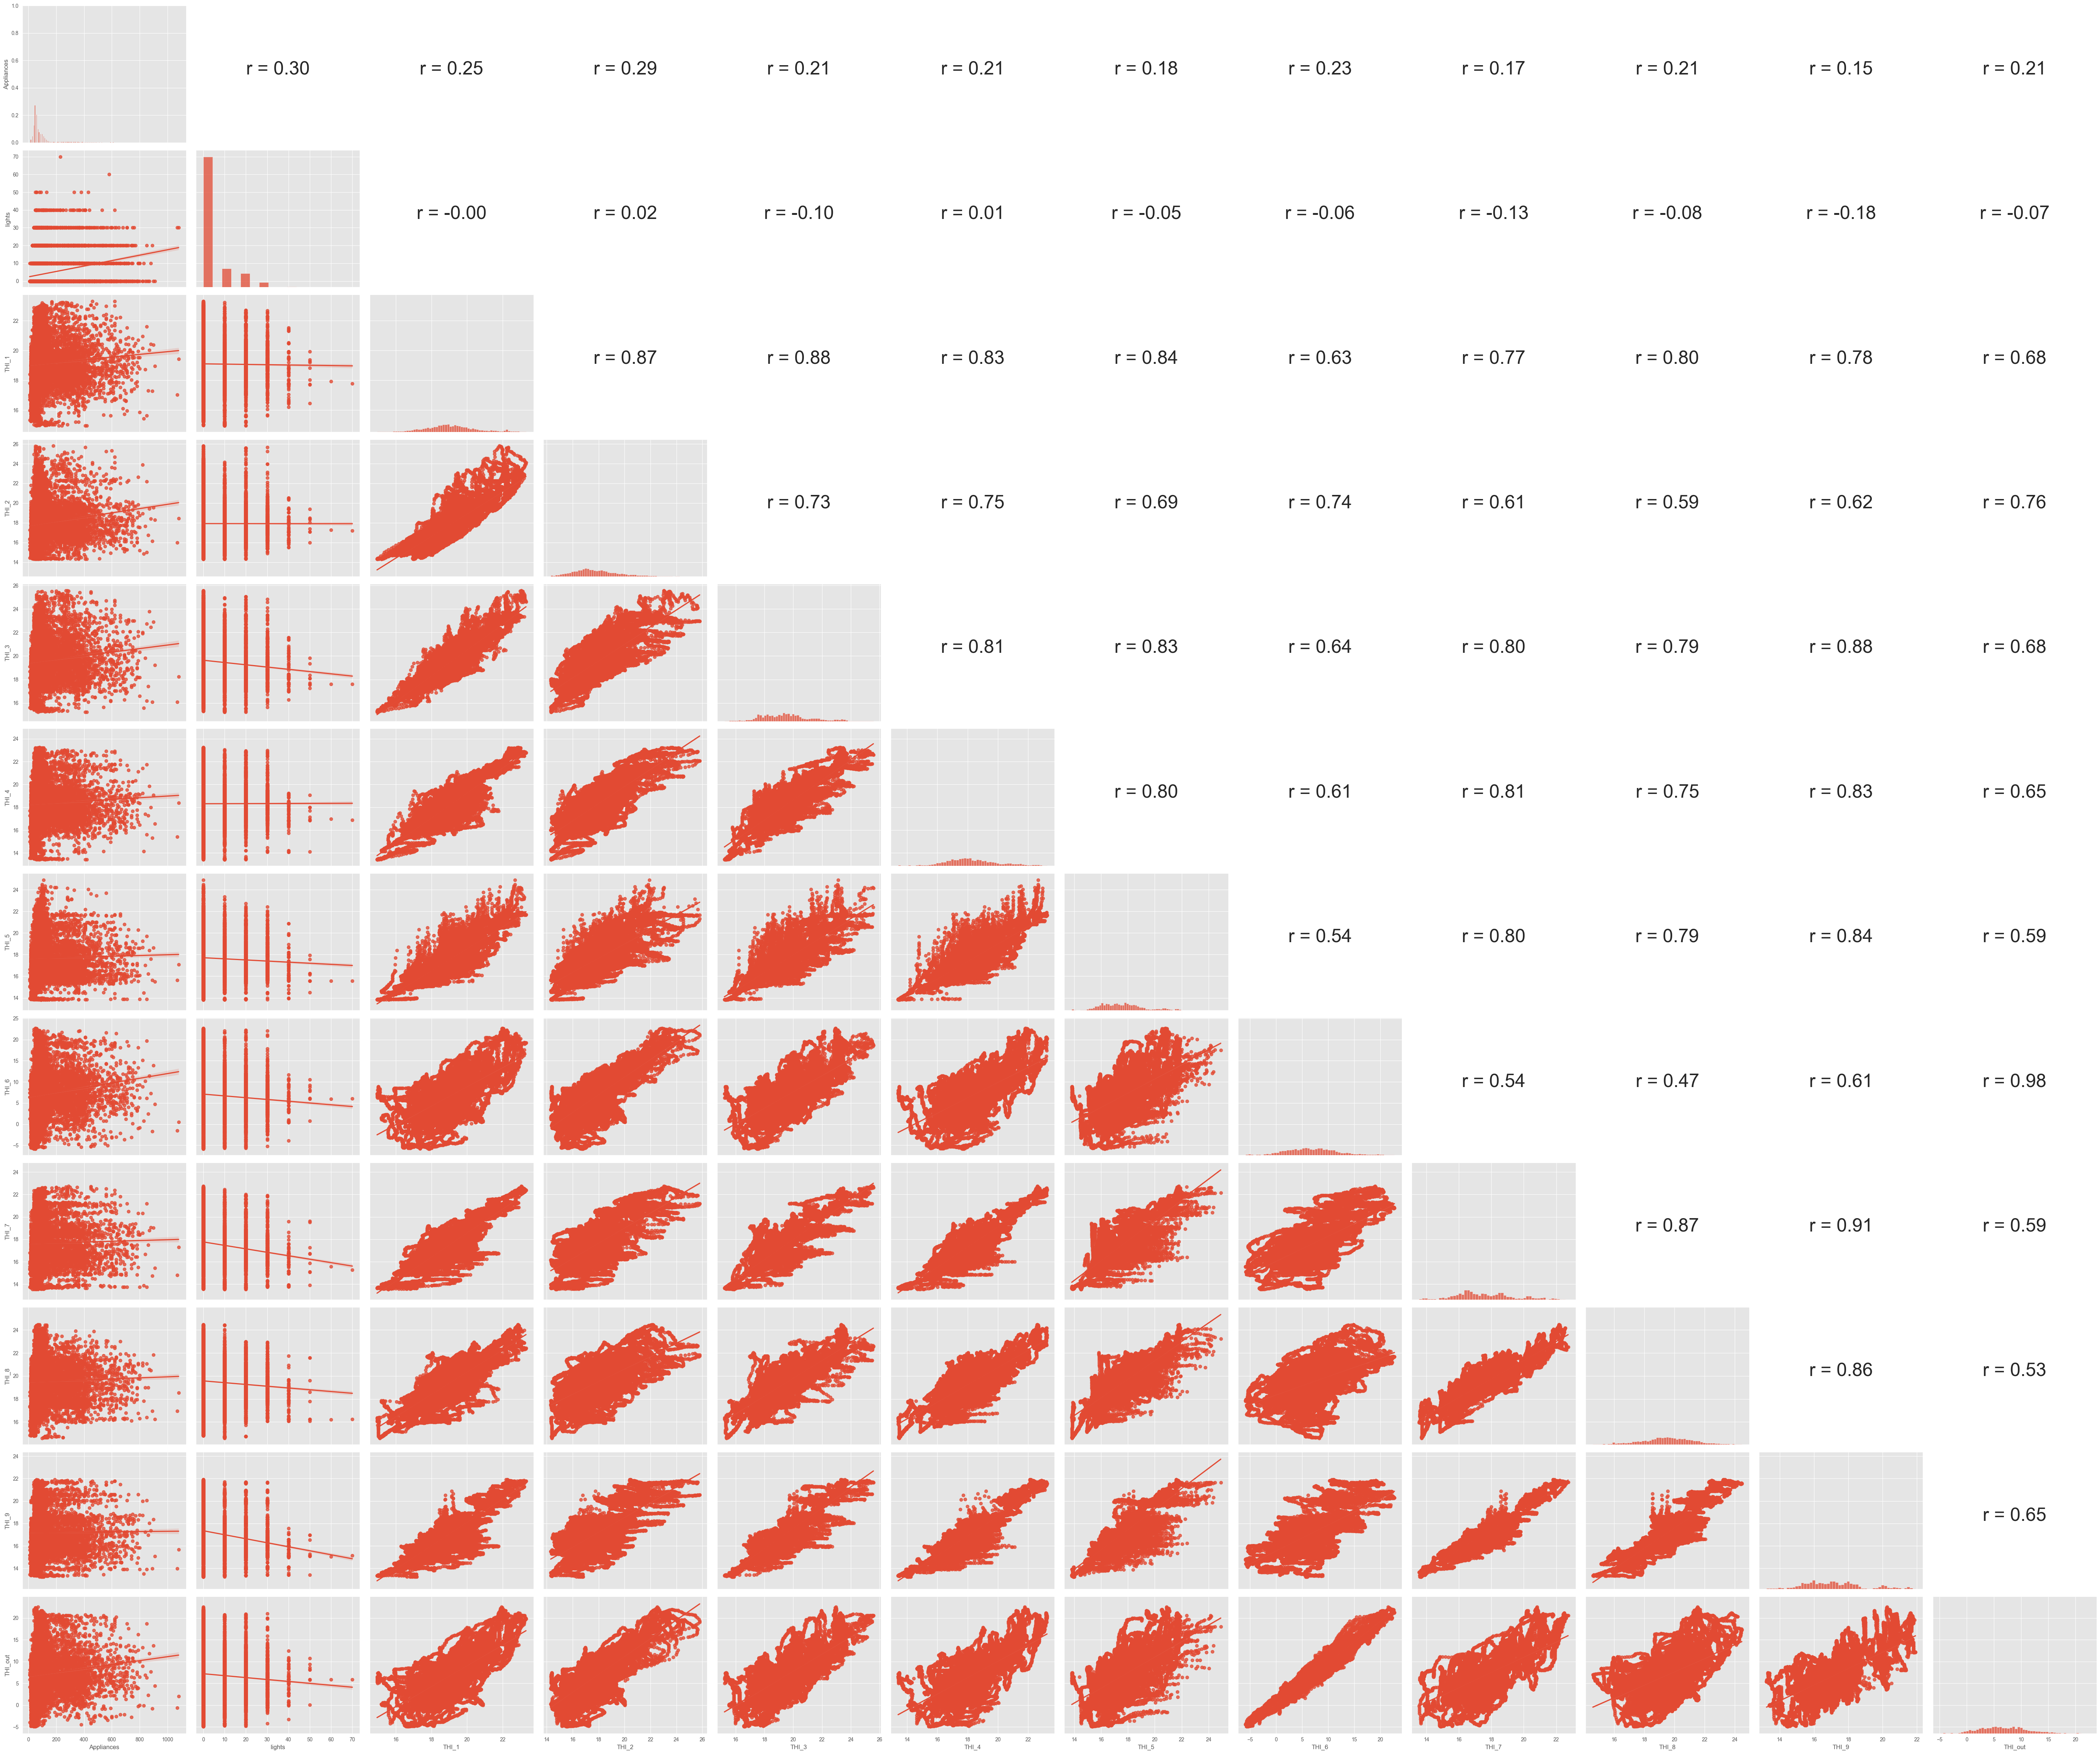

In [361]:
# Pairplot of THI & Appliances
#from scipy.stats import pearsonr
#def reg_coef(x,y,label=None,color=None,**kwargs):
#    ax = plt.gca()
#    r,p = pearsonr(x,y)
#    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
#    ax.set_axis_off()
#
#iris = sns.load_dataset("iris")
#g = sns.PairGrid(df)
#g.map_diag(sns.distplot)
#g.map_lower(sns.regplot)
#g.map_upper(reg_coef)
feature_needed=['Appliances','lights','THI_1','THI_2','THI_3','THI_4','THI_5','THI_6','THI_7','THI_8','THI_9','THI_out']
dfxx=df[feature_needed]#[df.columns[0:10]]
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

def reg_coef(x, y, label=30, color=None, **kwargs):
    ax = plt.gca()
    r, p = spearmanr(x, y)
    ax.annotate(f'r = {r:.2f}', xy=(0.5, 0.5), xycoords='axes fraction',
                ha='center', fontsize=36)  # 👈 Bigger text
    ax.set_axis_off()

# Sample dataset
#iris = sns.load_dataset("iris")

# Bigger figure: height=4 means each subplot is 4" tall, aspect=1.2 stretches width
g = sns.PairGrid(dfxx, height=4, aspect=1.2)
g.map_diag(sns.histplot)         # `distplot` is deprecated
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

plt.show()


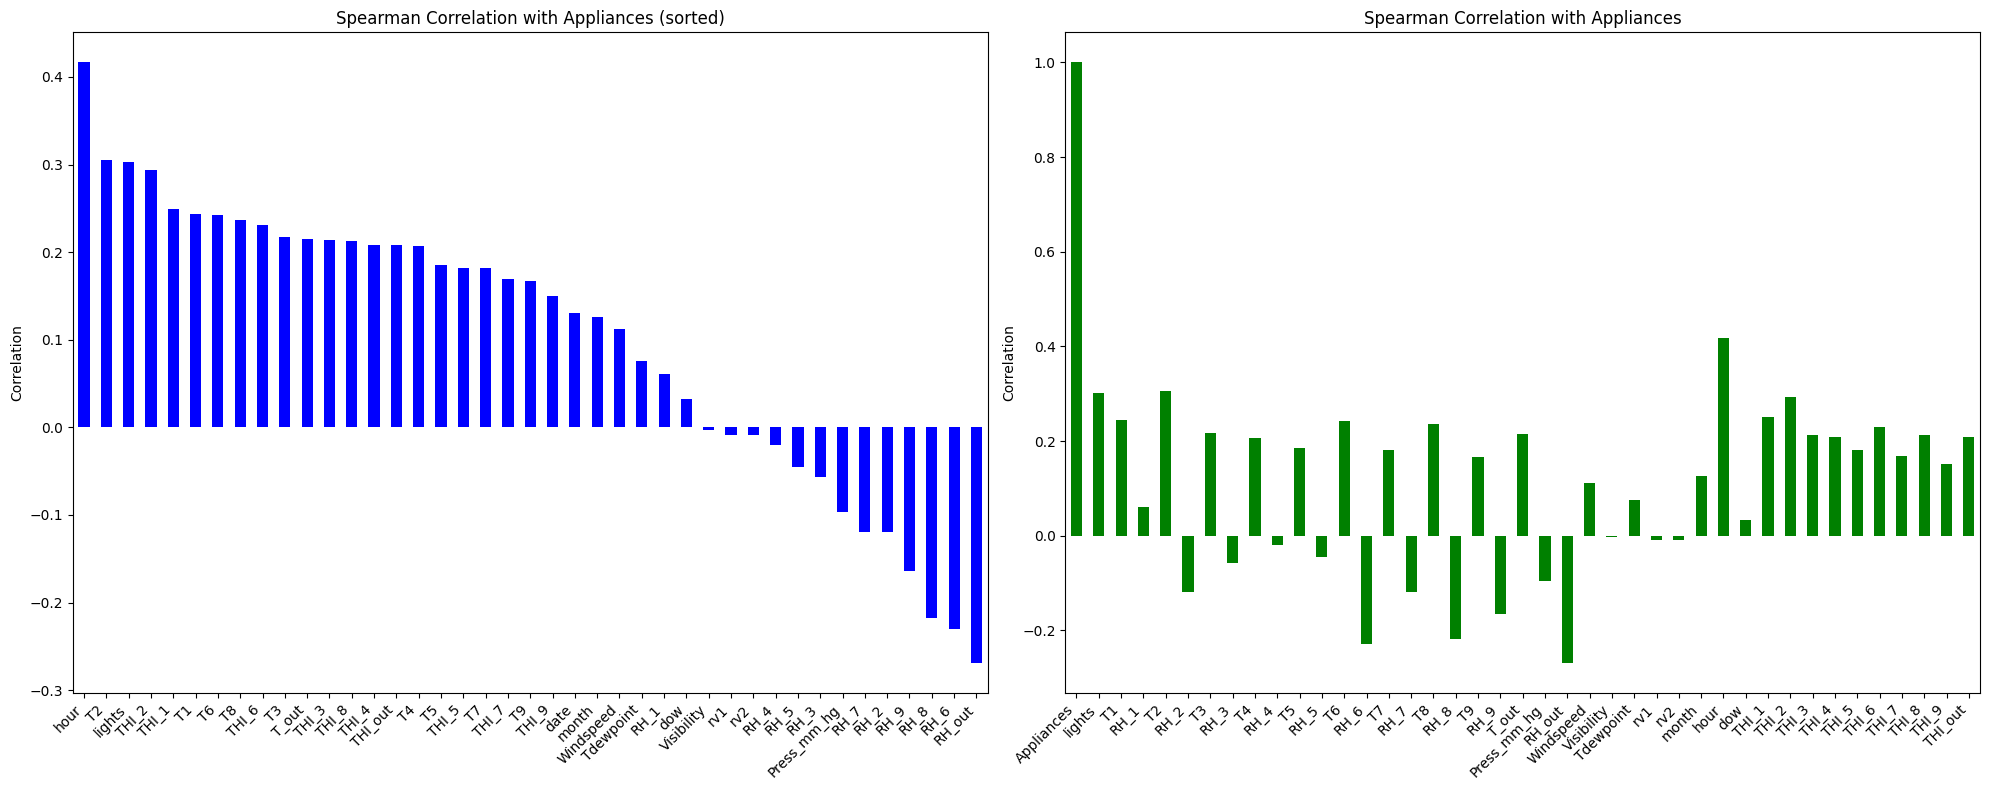

In [13]:
# Plot Correlation All Features to Target 
import warnings
warnings.filterwarnings("ignore")
# Calculate your correlations

corr_sorted = df.corr(method='spearman')['Appliances'].sort_values(ascending=False)[1:]
corr_unsorted = df.corr(method='spearman')['Appliances'][1:]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: Sorted correlations
corr_sorted.plot(kind='bar', color='blue', ax=axes[0])
axes[0].set_title("Spearman Correlation with Appliances (sorted)")
axes[0].set_ylabel("Correlation")
axes[0].set_xticklabels(corr_sorted.index, rotation=45, ha='right')

# Second subplot: Unsorted correlations
corr_unsorted.plot(kind='bar', color='green', ax=axes[1])
axes[1].set_title("Spearman Correlation with Appliances")
axes[1].set_ylabel("Correlation")
axes[1].set_xticklabels(corr_unsorted.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


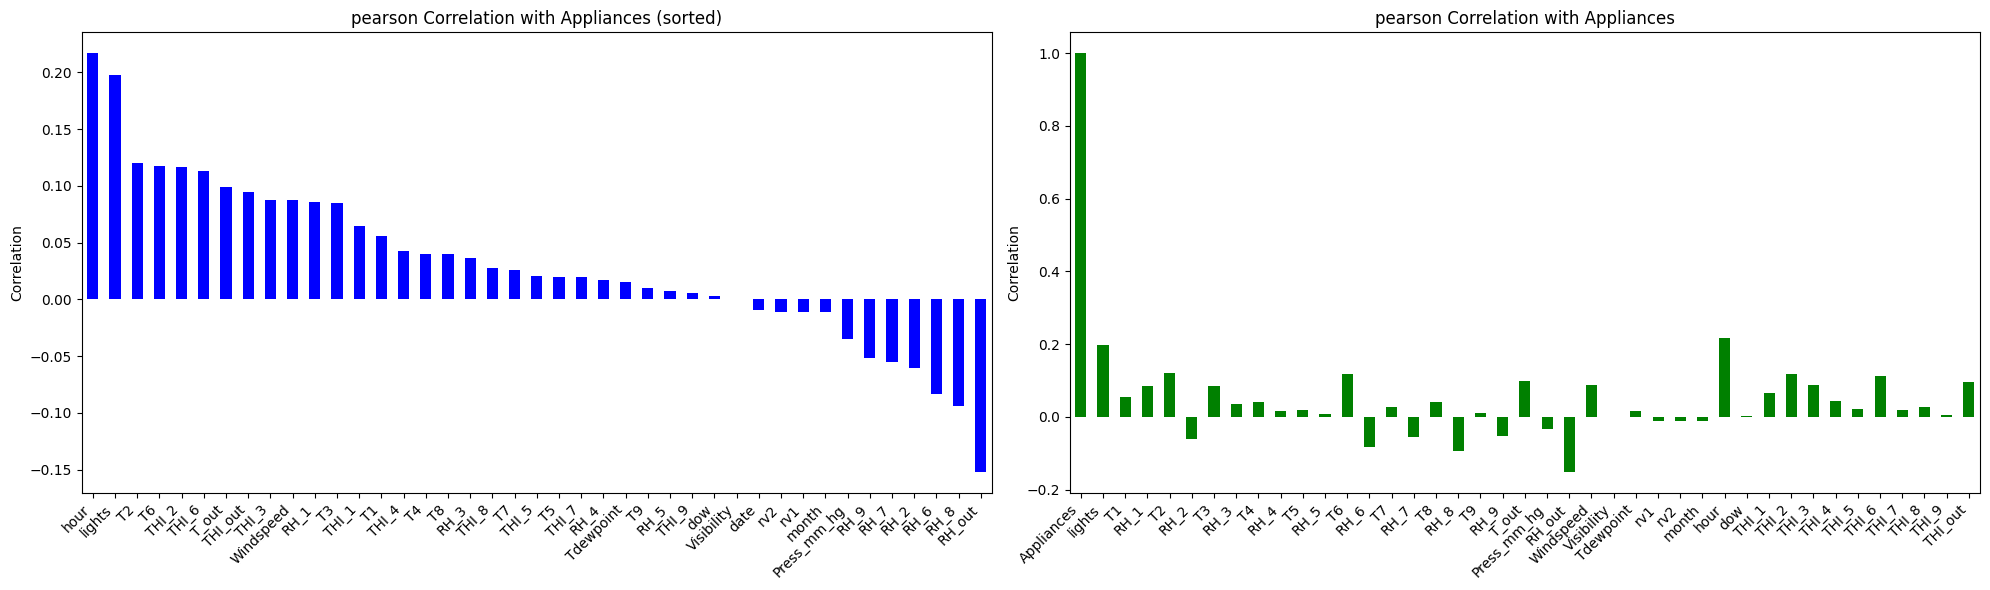

In [14]:
# Plot of Correlation All Feature to Target 
import warnings
warnings.filterwarnings("ignore")
#X.corr()
import matplotlib.pyplot as plt
import pandas as pd
#df.corr(method='spearman')['Appliances'].sort_values(ascending=False)[1:].plot(kind='bar')
#df.corr(method='spearman')['Appliances'][1:].plot(kind='bar')
import matplotlib.pyplot as plt
me='pearson'
# Calculate your correlations
corr_sorted = df.corr(method=me)['Appliances'].sort_values(ascending=False)[1:]
corr_unsorted = df.corr(method=me)['Appliances'][1:]

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# First subplot: Sorted correlations
corr_sorted.plot(kind='bar', color='blue', ax=axes[0])
axes[0].set_title(f"{me} Correlation with Appliances (sorted)")
axes[0].set_ylabel("Correlation")
axes[0].set_xticklabels(corr_sorted.index, rotation=45, ha='right')

# Second subplot: Unsorted correlations
corr_unsorted.plot(kind='bar', color='green', ax=axes[1])
axes[1].set_title(f"{me} Correlation with Appliances")
axes[1].set_ylabel("Correlation")
axes[1].set_xticklabels(corr_unsorted.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [15]:
# Correlation Between Variable Table
corr=dfx.corr(method='spearman')
corr
corr**2

date  Appliances        lights        T1      RH_1  \
date         1.000000    0.017174  3.818108e-02  0.454914  0.019018   
Appliances   0.017174    1.000000  9.145775e-02  0.059560  0.003663   
lights       0.038181    0.091458  1.000000e+00  0.000327  0.012073   
T1           0.454914    0.059560  3.270115e-04  1.000000  0.019426   
RH_1         0.019018    0.003663  1.207315e-02  0.019426  1.000000   
T2           0.216835    0.093081  5.400793e-04  0.710141  0.081542   
RH_2         0.009574    0.014337  2.123174e-03  0.000003  0.640233   
T3           0.643273    0.047025  1.233666e-02  0.751897  0.032947   
RH_3         0.168395    0.003256  1.138531e-02  0.000329  0.747045   
T4           0.601315    0.042912  1.621178e-05  0.669011  0.003931   
RH_4         0.059953    0.000409  9.465235e-03  0.013106  0.803817   
T5           0.612420    0.034539  5.665912e-03  0.726585  0.024091   
RH_5         0.093695    0.002016  1.007268e-02  0.001533  0.223262   
T6           0.332504    0.058795  5.245426e-03  0.382749  0.114146   
RH_6         0.699635    0.052778  2.398113e-02  0.362792  0.081424   
T7           0.701829    0.033079  1.910948e-02  0.607104  0.002233   
RH_7         0.026868    0.014258  3.429599e-04  0.017983  0.651689   
T8           0.619871    0.055765  6.958759e-03  0.648530  0.001141   
RH_8         0.077918    0.047192  1.724392e-05  0.000370  0.522383   
T9           0.806201    0.027881  3.013023e-02  0.621462  0.002019   
RH_9         0.048626    0.027078  1.369929e-03  0.003890  0.571461   
T_out        0.320982    0.046442  5.321194e-03  0.420814  0.135850   
Press_mm_hg  0.006465    0.009250  9.233144e-05  0.016457  0.101792   
RH_out       0.090975    0.072407  2.156023e-03  0.087487  0.054818   
Windspeed    0.049675    0.012616  2.883978e-03  0.003578  0.043703   
Visibility   0.003636    0.000013  1.624350e-04  0.001531  0.000353   
Tdewpoint    0.181987    0.005658  1.911319e-03  0.282818  0.398333   
month        0.957775    0.015847  3.535389e-02  0.461848  0.014635   
hour         0.000002    0.173596  6.937338e-02  0.040486  0.000174   
dow          0.000020    0.001068  9.380799e-03  0.000196  0.004706   
THI_1        0.408441    0.062362  5.728873e-09  0.985212  0.058897   
THI_2        0.213423    0.086402  6.001786e-04  0.714947  0.122859   
THI_3        0.575797    0.045513  9.643079e-03  0.750730  0.063337   
THI_4        0.551635    0.043206  1.549783e-04  0.691768  0.021028   
THI_5        0.502013    0.033134  2.037937e-03  0.688165  0.046953   
THI_6        0.283589    0.053096  3.894729e-03  0.356449  0.149627   
THI_7        0.658679    0.028658  1.696629e-02  0.627505  0.000777   
THI_8        0.579549    0.045371  6.572103e-03  0.663300  0.002128   
THI_9        0.768598    0.022647  3.067460e-02  0.625521  0.009466   
THI_out      0.317626    0.043156  5.178232e-03  0.421654  0.152207   

                       T2      RH_2        T3      RH_3        T4  ...  \
date         2.168346e-01  0.009574  0.643273  0.168395  0.601315  ...   
Appliances   9.308071e-02  0.014337  0.047025  0.003256  0.042912  ...   
lights       5.400793e-04  0.002123  0.012337  0.011385  0.000016  ...   
T1           7.101409e-01  0.000003  0.751897  0.000329  0.669011  ...   
RH_1         8.154209e-02  0.640233  0.032947  0.747045  0.003931  ...   
T2           1.000000e+00  0.007709  0.479212  0.022368  0.499875  ...   
RH_2         7.708892e-03  1.000000  0.014088  0.499475  0.002067  ...   
T3           4.792119e-01  0.014088  1.000000  0.001739  0.649677  ...   
RH_3         2.236819e-02  0.499475  0.001739  1.000000  0.023084  ...   
T4           4.998751e-01  0.002067  0.649677  0.023084  1.000000  ...   
RH_4         7.285697e-02  0.550923  0.009965  0.790993  0.003404  ...   
T5           4.657900e-01  0.011625  0.767054  0.003743  0.680252  ...   
RH_5         1.393239e-03  0.167638  0.012763  0.306169  0.018495  ...   
T6           5.395896e-01  0.010679  0.426245  0.007946  0.373082  ..

Note: The correlation giving an information about which room temperature that having correlation with the appliances usage, at this case we can see, the living room, outside temperature, and laundry room are having a bit high, than others. 

### Boxplot

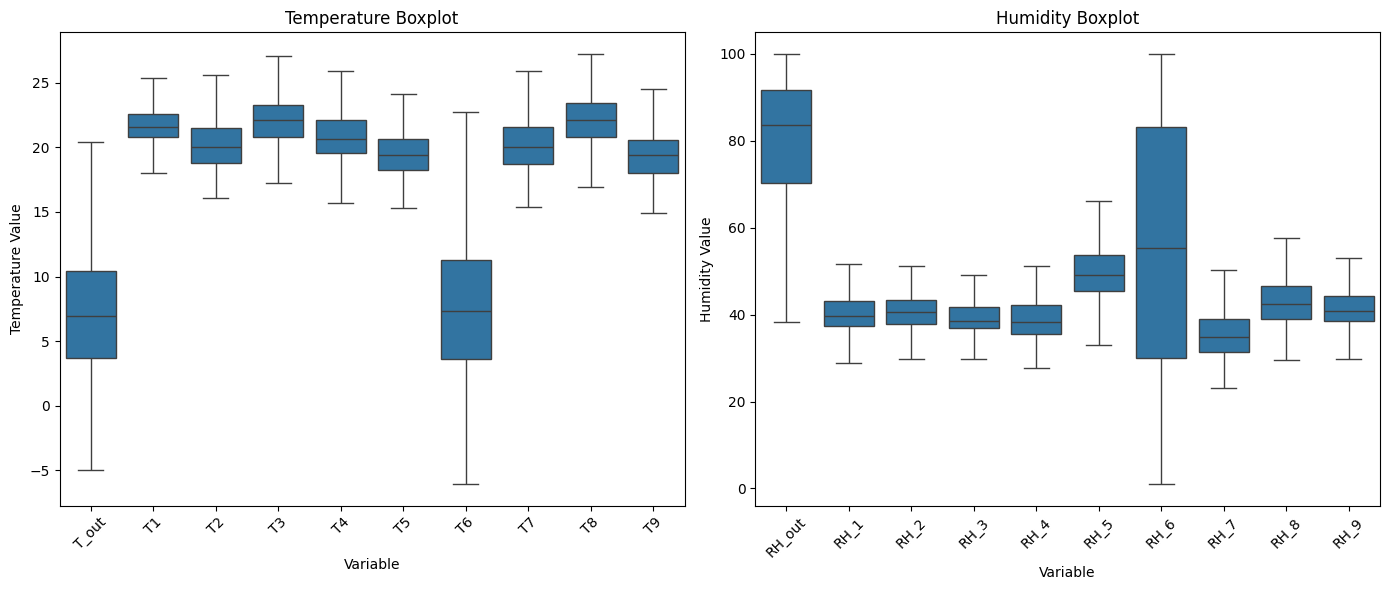

In [16]:
# Boxplot of Temperature and Relative Humidity 
import seaborn as sns
temperate=["T_out",]
humi=["RH_out",]
for i in range(1,10):
    x=f'T{i}'
    y=f'RH_{i}'
    temperate.append(x)
    humi.append(y)

df_temperature=df[temperate]
df_humidity=df[humi]

# Assume df_temperature and df_humidity are already defined

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Temperature boxplot
sns.boxplot(data=pd.melt(df_temperature), x='variable', y='value', showfliers=False, ax=axes[0])
axes[0].set_title("Temperature Boxplot")
axes[0].set_ylabel("Temperature Value")
axes[0].set_xlabel("Variable")
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Second subplot: Humidity boxplot
sns.boxplot(data=pd.melt(df_humidity), x='variable', y='value', showfliers=False, ax=axes[1])
axes[1].set_title("Humidity Boxplot")
axes[1].set_ylabel("Humidity Value")
axes[1].set_xlabel("Variable")
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()

Note: We can see in the boxplot the variation of indoor temperature consistent arround 15 to 25 degree celcius and the relative humidity consistence in 30 to 50. meanwhile, in the outside we can see the wider range of the temperature and relative humidity is -5 to 20 degree celcius and 20 to 100% respectively. From this boxplot, i'm wondering why the room temperature consistently remain in temperature and relative humidity above 15 degree celcius and 25% respectively. After read the paper carefully it turns out the cause of these consistence temperature its not necesarily by active room temperature control, but the building design also contribute keep the thermal situation consistence.

Direct Quotes & References from the Paper
“The low energy house was designed according to the passive house certification. For this certification, the building was designed to have an annual heating load and cooling load of no more than 15 kWh/m² per year according to the Passive House Planning Package (PHPP) software design tool.” (Section 2, House description)

“The building air leakage was measured in September 2016 and is 0.6 air changes per hour at 50 Pa. The house was designed with U < 0.1 W/m²K for the exterior walls, roof and ground. Triple glazed windows are used with Ug = 0.5 W/m²K and Uf < 0.9 W/m²K.”

“For highly insulated buildings, the thermal influence of appliances on internal gains become more important and relevant in building energy performance.” (Section 1.1, Literature review)

T-statistic: -23.413, P-value: 0.00000
U-statistic: 34634279.500, P-value: 0.00000


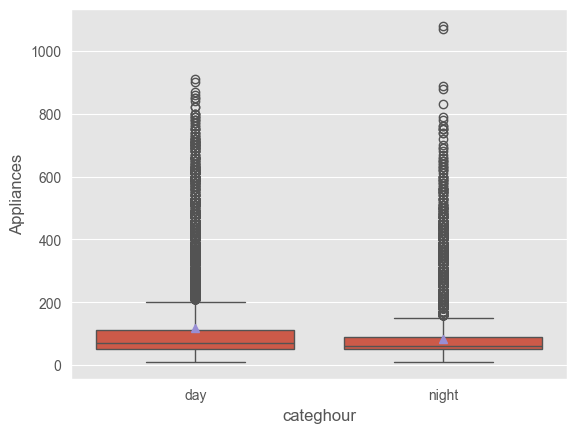

In [207]:
dfx=df.loc[df['Appliances']>0]
dfx['catehour']=dfx['date'].dt.hour
dfx['cateapp']=pd.cut(dfx['Appliances'],3)
dfx['cateTout']=pd.cut(dfx['T4'],2)
dfx['categhour']=pd.cut(dfx['catehour'],[0,6,17,24],labels=['night','day','night'],ordered=False)
#dfx['categtemp']=pd.cut(dfx['T_out'],[0,6,17,24],labels=['night','day','night'],ordered=False)
sns.boxplot(dfx,x='categhour',y='Appliances',showfliers=True,showmeans=True)
from scipy.stats import ttest_ind

# Split data into night and morning
night = dfx[dfx['categhour'] == 'night']['Appliances']
morning = dfx[dfx['categhour'] == 'day']['Appliances']

# Perform t-test
t_stat, p_val = ttest_ind(night, morning, equal_var=False)  # Welch's t-test (safer when variances may differ)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.5f}")

from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(night, morning, alternative='two-sided')

print(f"U-statistic: {u_stat:.3f}, P-value: {p_val:.5f}")

note: as we can see in the T test that i did and mann withney u stat, the difference of means between night and day usage of appliances is significance, we can also see in T test that in the night the usage of energy is lower than in day. 

### Histogram

In [28]:
# Distributions of appliances based on THI 
import pandas as pd
import plotly.express as px

# Filter data
dfx = df.loc[df['Appliances'] > -1]
variable_toplot = 'THI_out'

# Create binned categories
bins = pd.cut(dfx[variable_toplot], bins=5)
dfx['categtemp'] = bins.astype(str)

# Ensure bin order is sorted properly
bin_order = [str(cat) for cat in sorted(bins.cat.categories)]

# Plot distribution using histogram with KDE-style overlay
fig = px.histogram(
    dfx,
    x='Appliances',
    color='categtemp',
    histnorm='percent',#'probability density',
    barmode='overlay',  # overlays the histograms
    opacity=0.6,
    category_orders={'categtemp': bin_order}
)

fig.update_layout(
    title='Distribution of Appliance Energy Use by THI_out Category',
    xaxis_title='Appliances (Wh)',
    yaxis_title='Density',
    legend_title='THI_out Category',
    bargap=0.15
)

fig.show()


In [48]:
# Distributions of appliances based on THI 
import pandas as pd
import plotly.express as px

# Filter data
dfx = df.loc[df['Appliances'] > -1]
variable_toplot = 'THI_out'

# Create binned temperature categories
bins = pd.cut(dfx[variable_toplot], bins=5)
dfx['categtemp'] = bins.astype(str)

# Sort bins by numerical lower bound
bin_order = [str(cat) for cat in sorted(bins.cat.categories)]

# Create faceted histogram (1 column, 5 rows)
fig = px.histogram(
    dfx,
    x='Appliances',
    facet_row='categtemp',
#    histnorm='probability density',
    histnorm='percent',
    color_discrete_sequence=['steelblue'],
    category_orders={'categtemp': bin_order},
    nbins=200,  # Adjust bin granularity as needed
    opacity=0.75
)

# Update layout and axis labels
fig.update_layout(
    title='Distribution of Appliance Energy Use per THI_out Category (Faceted)',
    height=1080,  # Adjust for readability
    showlegend=False,bargap=0.2
)

fig.update_xaxes(title='Appliances (Wh)')
fig.update_yaxes(title='Density')

fig.show()


T-test → T-statistic: -4.701, P-value: 0.00000
Mann-Whitney U → U-statistic: 777428.000, P-value: 0.00000


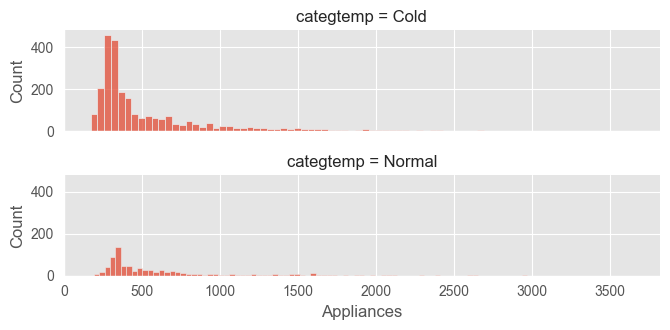

In [381]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt

# Filter data
dfx = df.loc[df['Appliances'] > -200]
dfx=dfx.set_index('date')
dfx=dfx.resample('1h').mean()
dfx['Appliances']=dfx['Appliances']*6
dfx.reset_index(inplace=True)
variable_toplot = 'THI_out'

# Define just two temperature categories: Cold and Normal
bins = pd.cut(dfx[variable_toplot], [-5, 10, 40], labels=['Cold', 'Normal'])
dfx['categtemp'] = bins


# OPTIONAL: check unique values to verify data
#print("Temperature groups:", dfx['categtemp'].unique())
#print("Time-of-day groups:", dfx['categhour'].unique())

# Now let's test energy usage difference between Cold and Normal
cold = dfx[dfx['categtemp'] == 'Cold']['Appliances']
normal = dfx[dfx['categtemp'] == 'Normal']['Appliances']

# Welch's t-test (no assumption of equal variance)
t_stat, p_val = ttest_ind(cold, normal, equal_var=False)
print(f"T-test → T-statistic: {t_stat:.3f}, P-value: {p_val:.5f}")

# Mann-Whitney U test (non-parametric)
u_stat, p_val = mannwhitneyu(cold, normal, alternative='two-sided')
print(f"Mann-Whitney U → U-statistic: {u_stat:.3f}, P-value: {p_val:.5f}")

# Plot distribution of appliances by temperature category
dfx=dfx.loc[dfx['Appliances'] > 0]
bin_order = ['Cold', 'Normal']
g = sns.FacetGrid(dfx, row="categtemp", height=1.7, aspect=4, row_order=bin_order)
g.map(sns.histplot, "Appliances", bins=80)
plt.show()

Note: One of my considerations for setting thresholds to reduce appliance energy use is based on the graph above. From this visualization, we observe that when the outside temperature is between -4°C and 10°C, an energy usage threshold of 800 Wh per hour for appliances seems appropriate. When the outside temperature is warmer (>10°C), I set a lower threshold of 500 Wh per hour.

However, despite using a higher threshold for colder temperatures, the t-statistic reveals an interesting finding: the mean appliance energy usage is actually higher when the outside temperature is above 10°C, compared to when it is below 10°C. we can also see in the first and second histogram in these histogram section.  

There are several potential explanations:

1. Increased use of other appliances during warmer temperatures, possibly due to higher human activity.
2. Energy consumption for cooling may be higher than for heating.

However, these are only possible explanations, as the available data does not fully indicate when the warming season occurs.

## Model & Prediction Evaluation
<h2 id=mprdeval></h2>

In [234]:
#Custom Validation Function
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
import numpy as np

def custom_cross_validate(model_fn, X, y, n_splits=5, test_size=0.2, random_state=None):
    """
    Custom cross-validation function that calculates RMSE and R2 across folds.

    Parameters:
    - model_fn: function that returns an untrained model
    - X: features (numpy array or DataFrame)
    - y: target (numpy array or Series)
    - n_splits: number of total folds
    - test_size: proportion of each split to use as test data
    - random_state: reproducibility

    Returns:
    - rmse_scores: list of RMSEs
    - r2_scores: list of R² scores
    """
    assert 0 < test_size < 1, "test_size must be between 0 and 1"

    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    fold_size = len(X) // n_splits
    rmse_scores = []
    r2_scores = []
    mape_scores=[]
    mae_scores=[]
    for i in range(n_splits):
        start = i * fold_size
        end = start + fold_size
        fold_indices = indices[start:end]

        test_count = int(test_size * len(fold_indices))
        test_idx = fold_indices[:test_count]
        train_idx = np.concatenate([fold_indices[test_count:], indices[:start], indices[end:]])

        # 🔧 Fix: use .iloc for Pandas objects
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = model_fn()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae= mean_absolute_error(y_test, y_pred)
        mape=mean_absolute_percentage_error(y_test, y_pred)

        rmse_scores.append(rmse)
        mae_scores.append(mae)
        mape_scores.append(mape)
        r2_scores.append(r2)

    print(f"Avg RMSE: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")
    print(f"Avg R²: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")

    return rmse_scores, r2_scores,mae_scores,mape_scores,y_pred,y_test


In [ ]:
# LOAD MODEL CONFIGURATION
#------------Linear Regression--------------#
# Initialize and train the linear regression model
from sklearn.linear_model import LinearRegression

def model_lr_ghz():
    return LinearRegression(
        fit_intercept=True,   # Learn the intercept (bias) term
        #normalize='deprecated',  # Deprecated; handled in preprocessing if needed
        n_jobs=-1             # Use all CPU cores for computation
    )


#------------Gradient Boosting Regressor --------------#

from sklearn.ensemble import GradientBoostingRegressor

def model_gbm_ghz():
    return GradientBoostingRegressor(
        n_estimators=350,        # Number of boosting stages
        learning_rate=0.35,       # Shrinks contribution of each tree
        max_depth=7,             # Depth of individual trees
        min_samples_split=4,     # Minimum samples to split an internal node
        min_samples_leaf=2,      # Minimum samples at a leaf node
        subsample=0.8,           # Fraction of samples used for fitting each base learner
        max_features='sqrt',     # Number of features to consider when looking for best split
        random_state=42          # Ensures reproducibility
    )


#---------XGBREGRESSOR--------------#
import xgboost as xgb

def model_xgb_ghz():
    return xgb.XGBRegressor(
        tree_method='gpu_hist',
        predictor='gpu_predictor',
        n_estimators=300,
        learning_rate=0.2,
        max_depth=7,
        random_state=42
    )

#---------MLPREGRESSOR--------------#
from sklearn.neural_network import MLPRegressor
def model_mlpr_ghz():
    #return MLPRegressor(hidden_layer_sizesarray=(20,20),random_state=1, max_iter=2000, tol=0.1)
    return MLPRegressor(
        hidden_layer_sizes=(128, 64, 32, 16),  # 3 layers with decreasing size
        activation='relu',                 # Non-linear activation for hidden layers
        solver='adam',                     # Optimizer that works well with noisy data
        alpha=0.0005,                      # Regularization to prevent overfitting
        learning_rate='adaptive',         # Reduces learning rate if model plateaus
        max_iter=1000,                    # High enough to ensure convergence
        random_state=42,
        early_stopping=True,              # Stops training if validation loss doesn’t improve
        validation_fraction=0.2,          # 20% of training data used for early stopping
        verbose=False
    )


#---------RF Regressor--------------#
from sklearn.ensemble import RandomForestRegressor

def model_rf_ghz():
    return RandomForestRegressor(
        n_estimators=360,       # Number of trees in the forest
        max_depth=35,           # Limit tree depth to reduce overfitting
        min_samples_split=5,    # Minimum samples to split an internal node
        min_samples_leaf=3,     # Minimum samples at a leaf node
        max_features='sqrt',    # Number of features to consider at each split
        bootstrap=True,         # Use bootstrapping (standard)
        random_state=42,
        n_jobs=-1,              # Use all available cores for speed
        verbose=0
    )


#----------- Extra Trees----------#
from sklearn.ensemble import ExtraTreesRegressor

def model_etr_ghz():
    return ExtraTreesRegressor(
        n_estimators=350,
        max_depth=30,
        min_samples_split=4,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )

#------------ Hist Gradient Boosting -----(fast, native scikit-learn)
from sklearn.ensemble import HistGradientBoostingRegressor
def model_hgb_ghz():
    return HistGradientBoostingRegressor(
        max_iter=300,
        learning_rate=0.1,
        max_depth=10,
        l2_regularization=0.01,
        early_stopping=True,
        random_state=42
    )


#------------------KNRegressor--------------#
from sklearn.neighbors import KNeighborsRegressor

def model_knn_ghz():
    return KNeighborsRegressor(
        n_neighbors=7,        # Number of neighbors to use
        weights='distance',   # Weight by distance (closer neighbors are more important)
        algorithm='auto',     # Automatically choose best algorithm
        leaf_size=30,         # Leaf size for tree-based algorithms (only relevant for large data)
        p=2,                  # Power parameter for the Minkowski metric (2 = Euclidean)
        n_jobs=-1             # Use all processors
    )


### Evaluation Process

In [246]:
# Cross Validation Evaluation Process
from sklearn.preprocessing import MinMaxScaler
import time 

dfx = df.copy()#[df['Appliances'] > 0]
dfx['catehour']=dfx['date'].dt.hour
dfx['categhour']=pd.cut(dfx['catehour'],[-1,6,17,24],labels=[0,1,0],ordered=False)
dfx['categtemp']= pd.cut(dfx[variable_toplot], [-5, 10, 40], labels=[1,0])
dfx['categhour'],dfx['categtemp']=dfx['categhour'].astype('int64'),dfx['categtemp'].astype('int64')
X = dfx.drop(columns=['Appliances', 'date', 'Visibility'])
y = dfx['Appliances']

modellist=[model_knn_ghz,model_hgb_ghz,model_etr_ghz,model_rf_ghz,model_mlpr_ghz,model_xgb_ghz,model_gbm_ghz,model_lr_ghz]


df_RMSE=pd.DataFrame()
df_R2=pd.DataFrame()
df_MAE=pd.DataFrame()
df_MAPE=pd.DataFrame()
dfpred=pd.DataFrame()


runtimes=[]
delname=[]

for i in modellist:
    modelname=str(i).split(" ")[1][:-4]
    print(f"\n-------------------------------------------------")
    print(f"Start Evaluate {modelname} ...")
    start_time = time.time()  # Start timer
    
    df_RMSE[f'RMSE_{modelname}'], df_R2[f'R^2_{modelname}'], df_MAE[f'MAE_{modelname}'], df_MAPE[f'MAPE_{modelname}'], y_pred,y_test= custom_cross_validate(
        i, X, y, n_splits=10, test_size=0.33, random_state=42)

    end_time = time.time()  # End timer
    duration = end_time - start_time
    runtimes.append(duration)  # Append model name and duration
    delname.append(modelname)  # Append model name and duration
    dfpred[f'{modelname}_Prediction']=y_pred
    dfpred[f'{modelname}_Observed']=y_test.reset_index()['Appliances']

    print(f"Evaluate {modelname} is Done... Time taken: {duration:.2f} seconds")    
    print(f"--------------------------------------------------\n")



-------------------------------------------------
Start Evaluate model_knn ...
Avg RMSE: 85.901 ± 4.433
Avg R²: 0.300 ± 0.065
Evaluate model_knn is Done... Time taken: 0.50 seconds
--------------------------------------------------


-------------------------------------------------
Start Evaluate model_hgb ...
Avg RMSE: 70.734 ± 6.132
Avg R²: 0.526 ± 0.060
Evaluate model_hgb is Done... Time taken: 8.89 seconds
--------------------------------------------------


-------------------------------------------------
Start Evaluate model_etr ...
Avg RMSE: 67.997 ± 5.684
Avg R²: 0.563 ± 0.048
Evaluate model_etr is Done... Time taken: 9.25 seconds
--------------------------------------------------


-------------------------------------------------
Start Evaluate model_rf ...
Avg RMSE: 67.835 ± 6.129
Avg R²: 0.565 ± 0.051
Evaluate model_rf is Done... Time taken: 32.68 seconds
--------------------------------------------------


-------------------------------------------------
Start Evaluate

### Metrics Evaluation

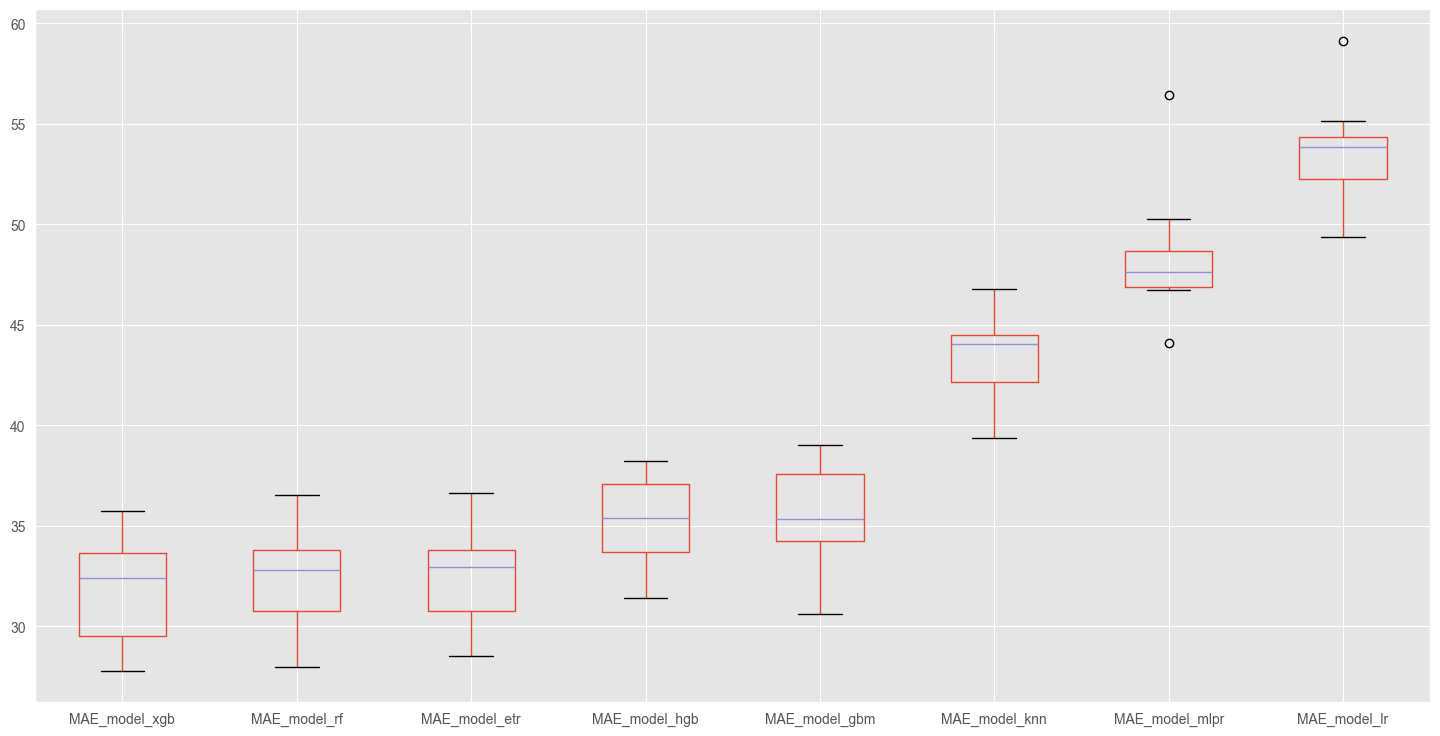

MAE_model_xgb  MAE_model_rf  MAE_model_etr  MAE_model_hgb  MAE_model_gbm  \
0      27.791561     27.970007      28.521944      31.413320      34.585444   
1      33.928162     33.201659      33.857309      35.737954      37.618902   
2      30.285229     30.785525      31.517879      33.562556      35.266416   
3      33.701523     33.956575      33.599092      36.849955      37.378013   
4      33.246864     33.527151      33.638196      38.063116      34.145350   
5      29.250240     30.723864      30.502056      34.171552      33.064071   
6      35.756386     36.554172      36.626462      38.226339      38.135704   
7      31.511311     32.382712      32.285355      35.002782      35.453661   
8      29.120619     29.441087      29.604477      31.894192      30.622183   
9      33.542419     33.894043      34.318994      37.163135      39.025110   

   MAE_model_knn  MAE_model_mlpr  MAE_model_lr  
0      42.705182       47.608541     49.599922  
1      46.339056       48.252794     53.658149  
2      41.097562       47.679603     51.776382  
3      44.068304       50.272063     54.400950  
4      43.999394       46.740532     53.834502  
5      41.944873       48.823879     53.882462  
6      46.784082       56.454571     59.137065  
7      44.428012       46.734735     55.136436  
8      39.349012       44.098371     49.378715  
9      44.541394       47.357800     54.115075

In [360]:
#Mean Absolute Error 
import matplotlib.pyplot as plt

# Sort columns by their mean (or median) MAE in descending order
sorted_cols = df_MAE.mean().sort_values(ascending=True).index
# If you prefer median:
# sorted_cols = df_MAE.median().sort_values(ascending=False).index

# Reorder the DataFrame columns
df_MAE_sorted = df_MAE[sorted_cols]

# Plot the sorted boxplot
plt.figure(figsize=(18, 9))
plt.style.use('ggplot')
df_MAE_sorted.boxplot()
plt.show()
df_MAE_sorted


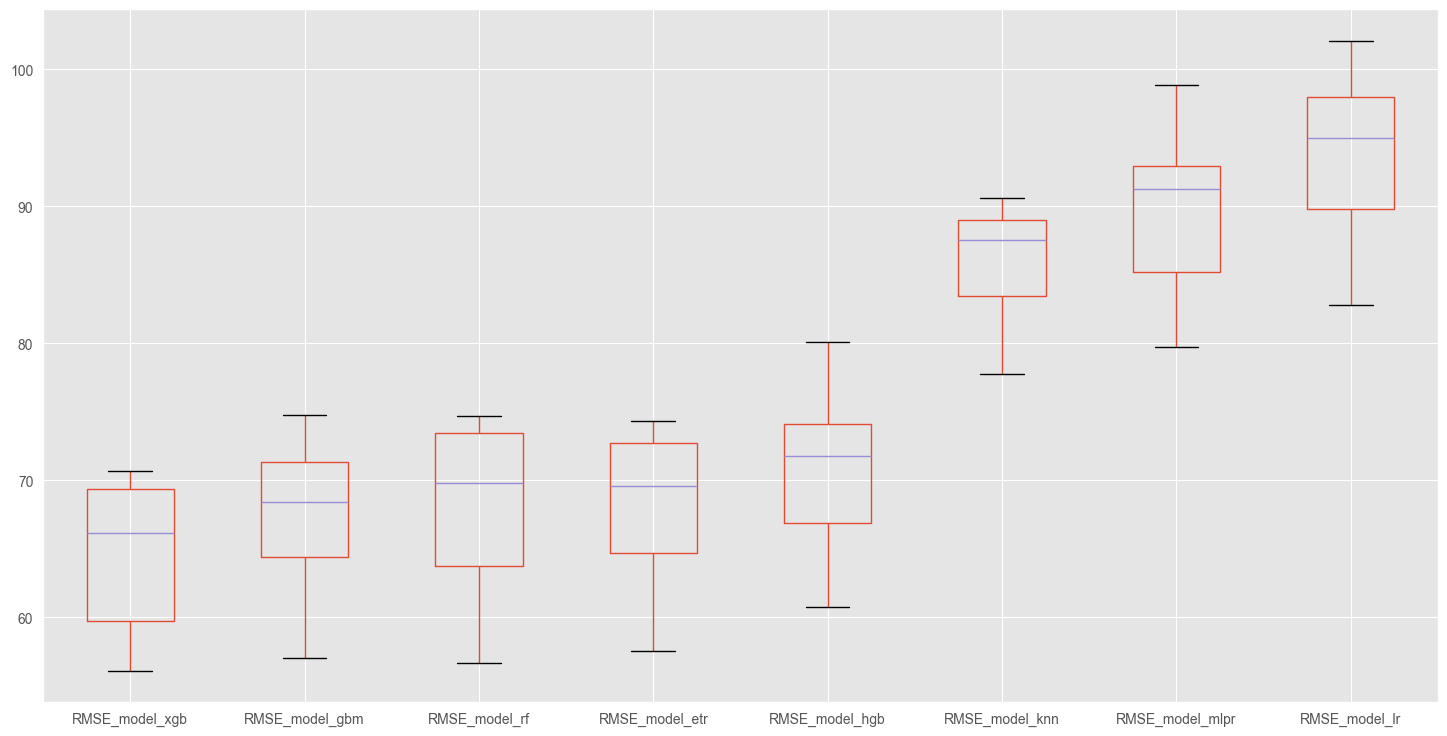

RMSE_model_xgb  RMSE_model_gbm  RMSE_model_rf  RMSE_model_etr  \
0       56.114405       64.461484      56.703133       57.538908   
1       70.678938       71.758104      68.864946       69.212198   
2       59.614765       64.358421      63.361305       64.544251   
3       69.503920       72.412808      73.956436       72.777603   
4       69.746689       69.174927      74.677904       74.304182   
5       60.182285       63.641703      64.914113       65.063604   
6       68.971037       70.212164      74.028886       74.054420   
7       64.300465       67.619927      70.746638       69.908605   
8       57.176470       57.003415      59.204506       59.846021   
9       68.046461       74.797924      71.893350       72.715270   

   RMSE_model_hgb  RMSE_model_knn  RMSE_model_mlpr  RMSE_model_lr  
0       60.767713       82.436368        82.320596      82.817104  
1       72.129241       86.772384        87.712775      90.312006  
2       65.774293       78.659069        84.336075      89.604486  
3       77.690128       88.288165        96.394844      99.319784  
4       80.123223       90.401508        91.411839      95.637034  
5       70.275236       86.456976        93.247527      98.277027  
6       74.214761       90.621804        98.872306     102.095698  
7       71.442261       89.159504        91.181459      97.186299  
8       61.160022       77.788806        79.725190      86.744383  
9       73.759232       88.425719        92.068668      94.412636

In [298]:
# Root Mean Squared Error
# Sort columns by their mean (or median) MAE in descending order
sorted_cols = df_RMSE.mean().sort_values(ascending=True).index
# If you prefer median:
# sorted_cols = df_MAE.median().sort_values(ascending=False).index

# Reorder the DataFrame columns
df_RMSE_sorted = df_RMSE[sorted_cols]

# Plot the sorted boxplot
plt.figure(figsize=(18, 9))
plt.style.use('ggplot')
df_RMSE_sorted.boxplot()
plt.show()
df_RMSE_sorted

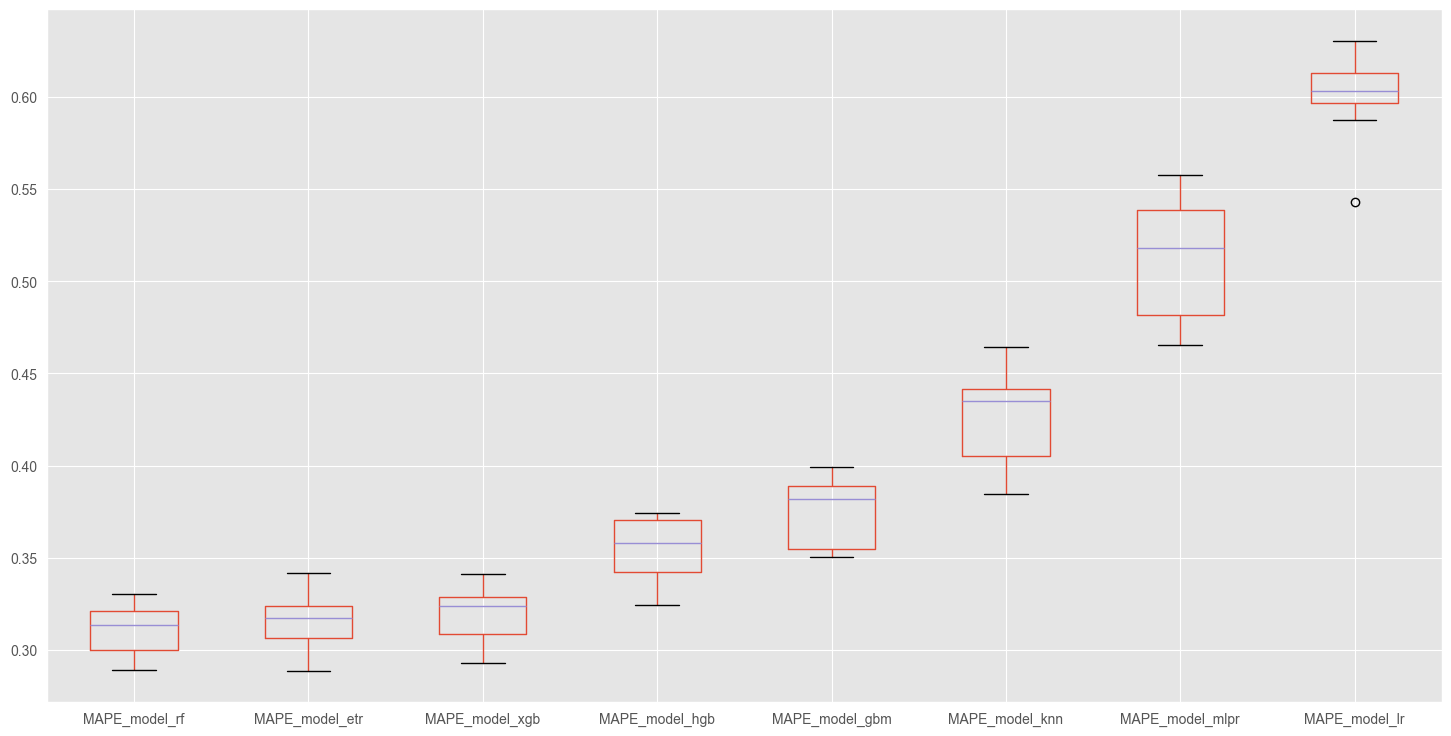

MAPE_model_rf  MAPE_model_etr  MAPE_model_xgb  MAPE_model_hgb  \
0       0.288925        0.290905        0.292931        0.341979   
1       0.330132        0.341556        0.341383        0.364286   
2       0.296261        0.304700        0.305802        0.335831   
3       0.292057        0.288818        0.302670        0.324152   
4       0.315151        0.321124        0.328788        0.374400   
5       0.321378        0.319405        0.328089        0.370965   
6       0.310852        0.312098        0.325087        0.342973   
7       0.312288        0.315739        0.317956        0.351826   
8       0.329834        0.333399        0.322864        0.370911   
9       0.320132        0.324923        0.330987        0.369585   

   MAPE_model_gbm  MAPE_model_knn  MAPE_model_mlpr  MAPE_model_lr  
0        0.390135        0.434577         0.557624       0.595138  
1        0.394469        0.459421         0.515628       0.614662  
2        0.386486        0.392289         0.544228       0.587451  
3        0.351077        0.384630         0.466095       0.542871  
4        0.351659        0.435870         0.494775       0.602794  
5        0.380861        0.441635         0.522324       0.624460  
6        0.350448        0.400965         0.553197       0.603231  
7        0.382526        0.464131         0.465638       0.630526  
8        0.364284        0.417982         0.519994       0.602094  
9        0.399048        0.441832         0.477170       0.608822

In [294]:
# Mean Absolute Percentage
# Sort columns by their mean (or median) MAE in descending order
sorted_cols = df_MAPE.mean().sort_values(ascending=True).index


# Reorder the DataFrame columns
df_MAPE_sorted = df_MAPE[sorted_cols]

# Plot the sorted boxplot
plt.figure(figsize=(18, 9))
plt.style.use('ggplot')
df_MAPE_sorted.boxplot()
plt.show()
df_MAPE_sorted

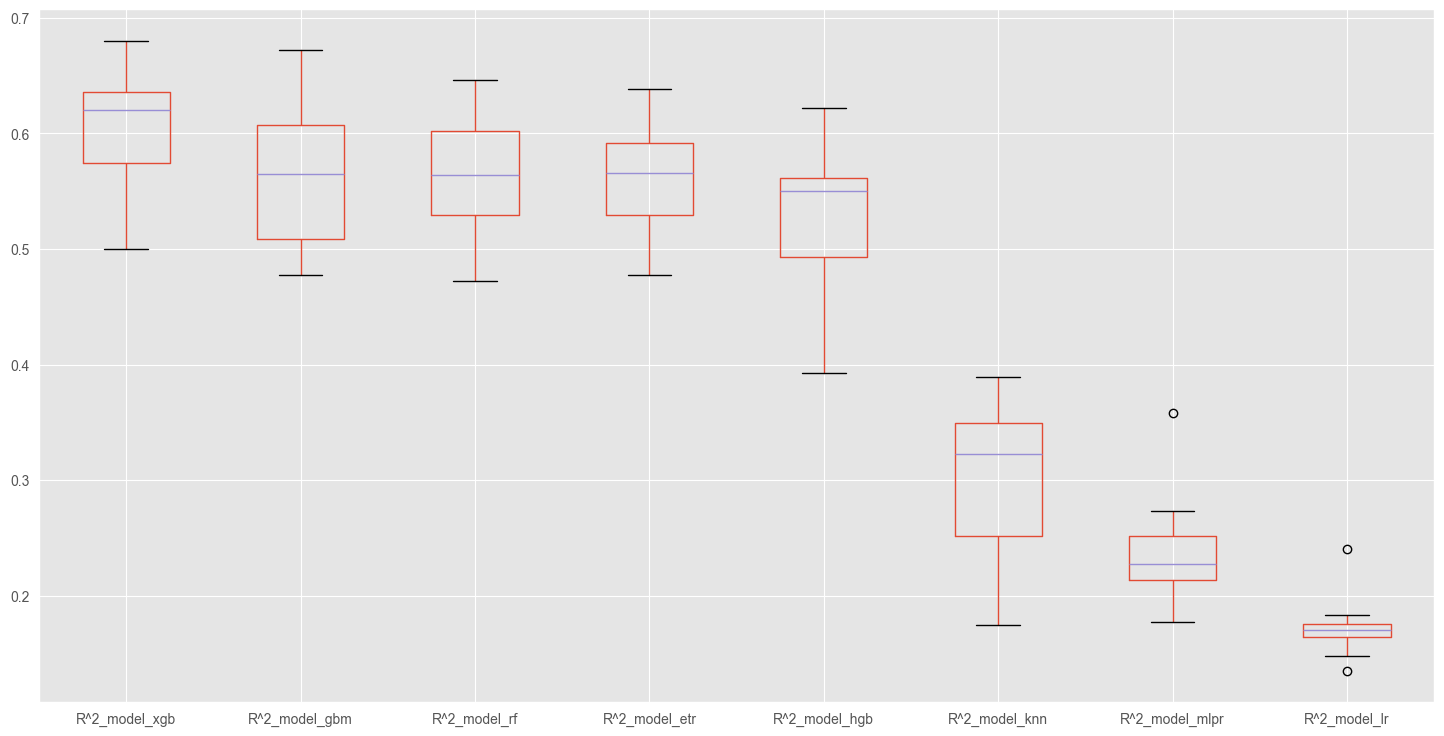

R^2_model_xgb  R^2_model_gbm  R^2_model_rf  R^2_model_etr  R^2_model_hgb  \
0       0.617552       0.495311      0.609485       0.597888       0.551493   
1       0.499821       0.484431      0.525166       0.520365       0.479084   
2       0.629383       0.568055      0.581335       0.565556       0.548840   
3       0.596267       0.561766      0.542883       0.557339       0.495562   
4       0.539973       0.547485      0.472624       0.477889       0.392910   
5       0.680315       0.642507      0.628069       0.626354       0.564098   
6       0.622961       0.609269      0.565634       0.565335       0.563450   
7       0.638492       0.600204      0.562376       0.572683       0.553728   
8       0.669902       0.671897      0.646070       0.638358       0.622303   
9       0.567477       0.477391      0.517191       0.506088       0.491805   

   R^2_model_knn  R^2_model_mlpr  R^2_model_lr  
0       0.174607        0.176923      0.166965  
1       0.246109        0.229680      0.183350  
2       0.354768        0.258272      0.162707  
3       0.348551        0.223425      0.175582  
4       0.227164        0.209793      0.135056  
5       0.340243        0.232535      0.147512  
6       0.349094        0.225177      0.173833  
7       0.304936        0.273053      0.174153  
8       0.388998        0.358200      0.240214  
9       0.269609        0.208189      0.167358

In [297]:
#R**2 

sorted_cols = df_R2.mean().sort_values(ascending=False).index


# Reorder the DataFrame columns
df_R2_sorted = df_R2[sorted_cols]

# Plot the sorted boxplot
plt.figure(figsize=(18, 9))
plt.style.use('ggplot')
df_R2_sorted.boxplot()
plt.show()
df_R2_sorted

Model Name     Runtime
7    model_lr    0.271613
0   model_knn    0.501515
1   model_hgb    8.886306
2   model_etr    9.247819
5   model_xgb   18.755636
3    model_rf   32.684951
6   model_gbm  149.024549
4  model_mlpr  165.649198

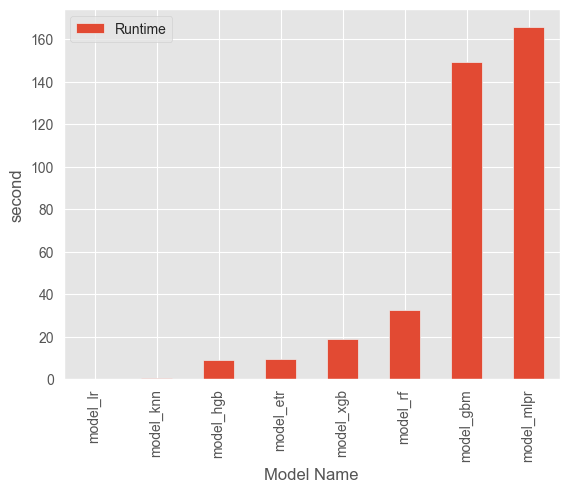

In [307]:
#Run time of cross validation process


# Reorder the DataFrame columns
df_efective=pd.DataFrame()
df_efective['Model Name']=delname
df_efective['Runtime']=runtimes

sorted_cols = df_efective.sort_values('Runtime')
#df_efective_sorted = df_efective[sorted_cols]
sorted_cols.plot(kind='bar',x='Model Name')


plt.ylabel('second')
sorted_cols

Note: In the end, the best-performing model is the XGB Regressor, with an RMSE between 56 and 70, MAE between 27 and 35, MAPE between 29% and 34%, and R² ranging from 0.49 to 0.66. Additionally, it achieved a runtime of just 20 seconds, which is impressive given its performance.

Based on the cross-validation evaluation metrics, the XGB Regressor is followed by Gradient Boosting and Random Forest. The main reasons for selecting XGB Regressor as the best model are its consistently higher R² compared to Random Forest, as well as its faster runtime during cross-validation.

### Prediction 

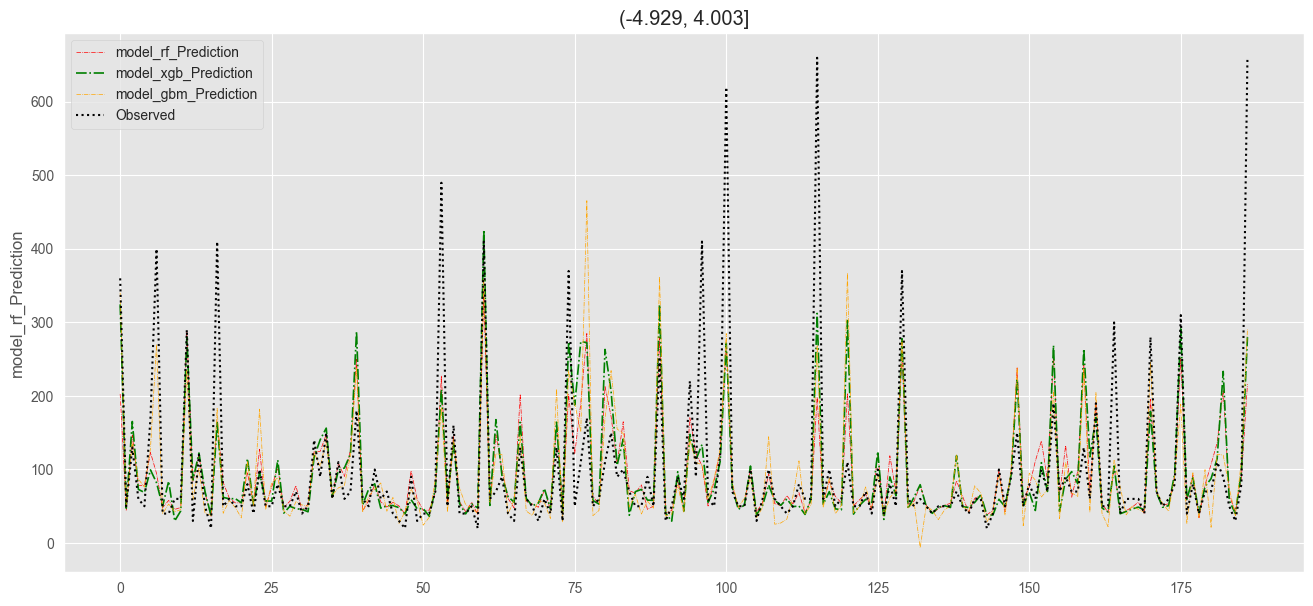

In [357]:
# Prediction result on THI <4
dfpred2=dfpred.copy()
dfpred2['Observed']=dfpred2['model_knn_Observed']
thidf=pd.DataFrame()
thidf['Observed']=y_test
thidf['THI']=X['THI_out']
thidf.reset_index(inplace=True)
dfpred2['THI']=thidf['THI']
#thidf.sort_values('THI')

bins = pd.cut(dfpred2['THI'],bins=3)#[-5,5,10,20] )
dfpred2['categtemp'] = bins.astype(str)

bin_order = [str(cat) for cat in sorted(bins.cat.categories)]
dfpred2=dfpred2.loc[(dfpred2['categtemp']==bin_order[0])]

#predi=predi[5:9]

#fig,axs=plt.subplots(3,1,layout='constrained')


#dfpred[predi].plot(kind='line')

dfpred2.reset_index(inplace=True)
predi = [col for col in dfpred2.columns if 'Prediction' in col]
predi=(predi[3],predi[5],predi[6])
predi=list(predi)
predi.append('Observed')

plt.figure(figsize=(16,7))
plt.style.use('ggplot')

# Define your column order (assuming predi is ordered as you want: [current, other, best, observation])
colors = ['red', 'green', 'orange', 'black']
linestyles = ['dashdot', 'dashdot', 'dashdot', 'dotted']
linewidths = [0.5, 1.2, 0.5, 1.5]
alphas = [1, 1, 1, 1]

for i, col in enumerate(predi):
    sns.lineplot(
        data=dfpred2[col],
        label=col,
        color=colors[i],
        linestyle=linestyles[i],
        linewidth=linewidths[i],
        alpha=alphas[i]
    )

plt.title(f"{bin_order[0]}")
plt.legend()
plt.show()


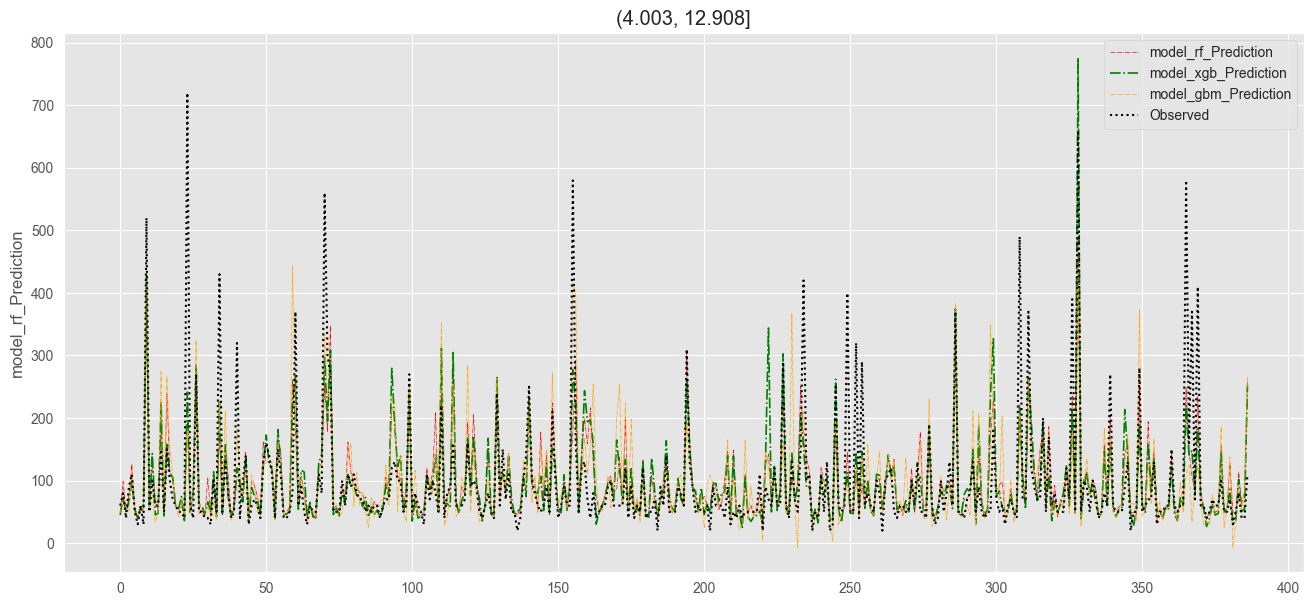

In [358]:
# Prediction result on THI 4 - 12
dfpred2=dfpred.copy()
dfpred2['Observed']=dfpred2['model_knn_Observed']
thidf=pd.DataFrame()
thidf['Observed']=y_test
thidf['THI']=X['THI_out']
thidf.reset_index(inplace=True)
dfpred2['THI']=thidf['THI']
#thidf.sort_values('THI')

bins = pd.cut(dfpred2['THI'],bins=3)#[-5,5,10,20] )
dfpred2['categtemp'] = bins.astype(str)

bin_order = [str(cat) for cat in sorted(bins.cat.categories)]
dfpred2=dfpred2.loc[(dfpred2['categtemp']==bin_order[1])]

#predi=predi[5:9]
plt.figure(figsize=(16,7))
#fig,axs=plt.subplots(3,1,layout='constrained')


#dfpred[predi].plot(kind='line')

dfpred2.reset_index(inplace=True)
predi = [col for col in dfpred2.columns if 'Prediction' in col]
predi=(predi[3],predi[5],predi[6])
predi=list(predi)
predi.append('Observed')
# Define your column order (assuming predi is ordered as you want: [current, other, best, observation])
colors = ['red', 'green', 'orange', 'black']
linestyles = ['dashdot', 'dashdot', 'dashdot', 'dotted']
linewidths = [0.5, 1.2, 0.5, 1.5]
alphas = [1, 1, 1, 1]

for i, col in enumerate(predi):
    sns.lineplot(
        data=dfpred2[col],
        label=col,
        color=colors[i],
        linestyle=linestyles[i],
        linewidth=linewidths[i],
        alpha=alphas[i]
    )

plt.title(f"{bin_order[1]}")
plt.legend()
plt.show()


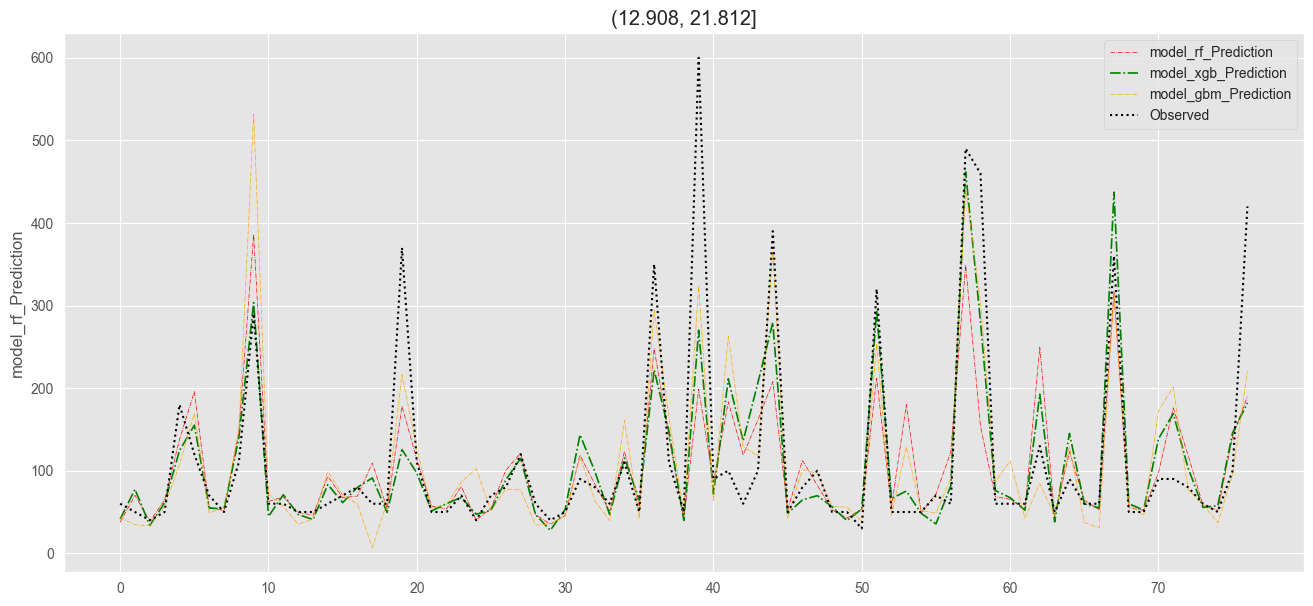

In [359]:
# Prediction result on THI >12 
dfpred2=dfpred.copy()
dfpred2['Observed']=dfpred2['model_knn_Observed']
thidf=pd.DataFrame()
thidf['Observed']=y_test
thidf['THI']=X['THI_out']
thidf.reset_index(inplace=True)
dfpred2['THI']=thidf['THI']
#thidf.sort_values('THI')

bins = pd.cut(dfpred2['THI'],bins=3)#[-5,5,10,20] )
dfpred2['categtemp'] = bins.astype(str)

bin_order = [str(cat) for cat in sorted(bins.cat.categories)]
dfpred2=dfpred2.loc[(dfpred2['categtemp']==bin_order[2])]

#predi=predi[5:9]
plt.figure(figsize=(16,7))
#fig,axs=plt.subplots(3,1,layout='constrained')


#dfpred[predi].plot(kind='line')

dfpred2.reset_index(inplace=True)
predi = [col for col in dfpred2.columns if 'Prediction' in col]
predi=(predi[3],predi[5],predi[6])
predi=list(predi)
predi.append('Observed')
# Define your column order (assuming predi is ordered as you want: [current, other, best, observation])
colors = ['red', 'green', 'orange', 'black']
linestyles = ['dashdot', 'dashdot', 'dashdot', 'dotted']
linewidths = [0.5, 1.2, 0.5, 1.5]
alphas = [1, 1, 1, 1]

for i, col in enumerate(predi):
    sns.lineplot(
        data=dfpred2[col],
        label=col,
        color=colors[i],
        linestyle=linestyles[i],
        linewidth=linewidths[i],
        alpha=alphas[i]
    )

plt.title(f"{bin_order[2]}")
plt.legend()
plt.show()

Note: The prediction performance also shows that the best model is very effective at predicting high energy usage (above 200 Wh) when the temperature is above 12°C, which in our case is considered a warmer temperature. However, when the temperature is colder, the model has more difficulty accurately predicting high energy usage.

**Recommendation** :
1. Conduct further observations, ideally covering a full seasonal cycle.
2. Add more detailed measurements or separate sensors for energy usage.
3. Explore and discuss additional strategies for reducing electricity consumption to achieve greater energy efficiency.
4. Use the XGB Regressor model, as it can explain approximately 60% of the variation in energy usage.

### To Simulate



In [286]:
# To do Simulations of real world case, you can use:
# X_test, and change the value into your desire value
# To calculate the appliances electricity usage with your thermal conditions

from sklearn.model_selection import train_test_split
dfx = df.copy()#[df['Appliances'] > 0]
dfx['catehour']=dfx['date'].dt.hour
dfx['categhour']=pd.cut(dfx['catehour'],[-1,6,17,24],labels=[0,1,0],ordered=False)
dfx['categtemp']= pd.cut(dfx[variable_toplot], [-5, 10, 40], labels=[1,0])
dfx['categhour'],dfx['categtemp']=dfx['categhour'].astype('int64'),dfx['categtemp'].astype('int64')
X = dfx.drop(columns=['Appliances', 'date', 'Visibility'])
X = dfx[[col for col in dfx.columns if 'THI' in col]] 
X['categtemp'],X['categhour']=dfx['categtemp'],dfx['categhour']
y = dfx['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=31)
modelo=model_xgb_ghz()
modelo.fit(X_train,y_train)
#modelo.fit(X,y)
#--------------ADJUST THIS------------------#

#data = {
#    'THI_kitchen': [22, 22], #Desire Room THI
#    'THI_living_room': [22, 22], #Desire Room THI
#    'THI_laundry_room': [22, 22], #Desire Room THI
#    'THI_office_room': [22, 22], #Desire Room THI
#    'THI_bathroom': [22, 22], #Desire Room THI
#    'THI_outside_north': [22, 22], #Desire Room THI
#    'THI_ironing_room': [22, 22], #Desire Room THI
#    'THI_teenager_room_2': [22, 22], #Desire Room THI
#    'THI_parents_room': [22, 22], #Desire Room THI
#    # Outside THI 
#    'THI_outside': [-3, -4]  
#}

data = {
    'THI_1': [23, 23], #Desire Room THI
    'THI_2': [22, 22], #Desire Room THI
    'THI_3': [22, 22], #Desire Room THI
    'THI_4': [24, 22], #Desire Room THI
    'THI_5': [22, 22], #Desire Room THI
    'THI_6': [0, 0], #Desire Room THI
    'THI_7': [22, 22], #Desire Room THI
    'THI_8': [22, 22], #Desire Room THI
    'THI_9': [22, 22], #Desire Room THI
    # Outside THI 
    'THI_out': [-7, -6],
    # Cold (1) Normal (0)
    'categtemp': [1,1],
    # Day (1) Night (0)
    'categhour':[1,1]  
}

X_testreal=pd.DataFrame( data) #in this you can make your own X_test but you have to make sure that the column exactly like the original X_test
y_pred=modelo.predict(X_test)

#To reduce the electricity you can adjust the yo result if its over the threshold of high usage


# use it just if you want to evaluate the result, but you have adjust the y_test
#--------------ADJUST THIS------------------#
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print(rmse)
print(r2)


print(f"When your outside THI: {data['THI_out']}")
modelo.fit(X,y)
yo=modelo.predict(X_testreal)


print(f"Predicted energy use: {yo-400} Wh/10minute (typical error: ±{mae:.1f} Wh/10minute, possible larger error: ±{rmse:.1f} Wh/10minute)")


64.75389482132523
0.5921911001205444
When your outside THI: [-7, -6]
Predicted energy use: [14.842773 57.368835] Wh/10minute (typical error: ±31.1 Wh/10minute, possible larger error: ±64.8 Wh/10minute)
